[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02%20An%C3%A1lisis%20Estad%C3%ADstico/notebooks/exercises/Ejercicio_Nutriologos.ipynb)

# Descripción del Ejercicio de NUTRIOLOGOS

Este ejercicio tiene como objetivo simular y analizar datos relacionados con la salud y el estilo de vida de individuos, con el fin de explorar patrones, relaciones y posibles predictores de enfermedades crónicas. Se generan datos sintéticos utilizando distribuciones estadísticas y lógica programática para representar una amplia gama de características relevantes para la salud, como edad, peso, hábitos alimenticios, historial médico familiar, niveles de actividad física, entre otros.

In [ ]:
import pandas as pd
import numpy as np

# Establecer la semilla
np.random.seed(42)

# Establecer la cantidad de datos a generar
cantidad_datos = 2000

El proceso comienza con la generación de datos simulados para una muestra de individuos, donde cada individuo está representado por múltiples características. Estas características incluyen medidas físicas como peso, altura, índice de masa corporal (IMC), circunferencia de cintura, así como información sobre estilo de vida, hábitos alimenticios, nivel de actividad física, niveles de estrés, consumo de alcohol y tabaco, entre otros.


# 1. Generación de datos

In [ ]:
# Definir funciones para generar datos simulados
#Funciones que definen Variables Independientes
def generar_edad():
  # Generar edades entre 18 y 80 años
    return np.random.randint(18, 81, cantidad_datos)

def generar_altura():
  # Distribución normal con media de 170 cm y desviación estándar de 10 cm
    return np.round(np.random.normal(170, 10, cantidad_datos))  # Redondear sin decimales

def generar_peso(edad, altura):
  # Distribución normal con media de 70 kg y desviación estándar de 15 kg
    peso_base = np.random.normal(70, 15, cantidad_datos)
  # Seleccionar un subconjunto del 10% de los individuos para simular la obesidad
    sobrepeso = np.random.choice(cantidad_datos, size=int(0.1*cantidad_datos), replace=False)
  # Ajustar el peso adicional basado en la altura para los individuos obesos
    peso_base[sobrepeso] += np.round((altura[sobrepeso] / 100) * 10, 2)  # Añadir peso adicional proporcional a la altura
  # Ajustar el peso basado en la edad
    peso = np.where((edad >= 40) & (edad <= 60), peso_base + 5, peso_base)  # Añadir 5 kg para edades entre 40 y 60
    return np.round(peso, 2) #Redondear a dos decimales

  #Calculos del IMC
  # Categorías de IMC según la OMS
categorias_imc = {
    'bajo_peso': (0, 18.5),
    'peso_normal': (18.5, 24.9),
    'sobrepeso': (25, 29.9),
    'obesidad': (30, float('inf'))
}
  #Asignacion de la categoria de IMC
def determinar_categoria_imc(imc):
    for categoria, (minimo, maximo) in categorias_imc.items():
        if minimo <= imc < maximo:
            return categoria
    return 'desconocido'
# Vectorizar la función
determinar_categoria_imc_vec = np.vectorize(determinar_categoria_imc)

def calcular_imc(peso, altura):
    # Fórmula del Índice de Masa Corporal (IMC): peso (kg) / altura (m)^2
    imc = np.round(peso / ((altura / 100) ** 2), 2)  # Redondear con 2 decimales
    categoria_imc = determinar_categoria_imc_vec(imc)
    return imc, categoria_imc

def generar_historial_medico_familiar():
  # Simulación de historial médico familiar
    enfermedades = ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares']
    historial_medico_familiar = []
    for _ in range(cantidad_datos):
        num_enfermedades = np.random.choice(enfermedades, np.random.randint(0, len(enfermedades)), replace=False)
        if num_enfermedades.size == 0:
            historial_medico_familiar.append('ND')
        else:
            historial_medico_familiar.append(', '.join(num_enfermedades))
    return historial_medico_familiar

def generar_sensibilidad_alimentos():
    # Lista de posibles alimentos a los que se puede ser sensible
    alimentos = ['Lactosa', 'Gluten', 'Nueces', 'Mariscos', 'Huevo', 'Soja']
    sensibilidad_alimentos = []
    for i in range(cantidad_datos):
      num_alergias = np.random.choice(alimentos, np.random.randint(0, min(3, len(alimentos))), replace =False)
      if num_alergias.size == 0:
        sensibilidad_alimentos.append('Ninguna')
      else:
        sensibilidad_alimentos.append(', '.join(num_alergias))
    return sensibilidad_alimentos

def generar_nivel_satisfaccion_dieta_actual():
    # Generar un número aleatorio entre 1 y 10 para el nivel de satisfacción con la dieta actual
    return np.random.randint(1, 11, cantidad_datos)

#Funciones que definen Variables que dependen del IMC

def generar_circunferencia_cintura(categoria_imc):
    # Distribución normal con media de 90 cm y desviación estándar de 10 cm
    circunferencia_cintura = []
    for i in range(cantidad_datos):
      media = 90
      desviacion_estandar = 10
      if categoria_imc[i] == 'obesidad':
          media += 5  # Ajustar la media hacia arriba para la obesidad
      elif categoria_imc[i] == 'sobrepeso':
           media += 2  # Ajustar la media hacia arriba para el sobrepeso
      elif categoria_imc[i] == 'bajo_peso':
           media -= 2  # Ajustar la media hacia abajo para el bajo peso
      circunferencia_cintura.append(np.round(np.random.normal(media, desviacion_estandar))) # Redondear sin decimales
    return circunferencia_cintura

def generar_circunferencia_cadera(categoria_imc):
    # Distribución normal con media de 100 cm y desviación estándar de 10 cm
    circunferencia_cadera = []
    for i in range(cantidad_datos):
        media = 100
        desviacion_estandar = 10
        if categoria_imc[i] == 'obesidad':
            media += 5  # Ajustar la media hacia arriba para la obesidad
        elif categoria_imc[i] == 'sobrepeso':
            media += 2  # Ajustar la media hacia arriba para el sobrepeso
        elif categoria_imc[i] == 'bajo_peso':
            media -= 2  # Ajustar la media hacia abajo para el bajo peso
        circunferencia_cadera.append(np.round(np.random.normal(media, desviacion_estandar))) # Redondear sin decimales
    return circunferencia_cadera

def generar_porcentaje_grasa_corporal(edad, categoria_imc):
    # Distribución normal con media de 25% y desviación estándar de 5%
    porcentaje_grasa_corporal = []
    for i in range(cantidad_datos):
        media = 25
        desviacion_estandar = 5
        if categoria_imc[i] == 'obesidad':
            media += 2  # Ajustar la media hacia arriba para la obesidad
        elif categoria_imc[i] == 'sobrepeso':
            media += 1  # Ajustar la media hacia arriba para el sobrepeso
        elif categoria_imc[i] == 'bajo_peso':
            media -= 1  # Ajustar la media hacia abajo para el bajo peso
        # Ajustar la media según la edad
        if 18 <= edad[i] <= 39:
            media -= 1  # Ajustar la media hacia abajo para las edades más jóvenes
        elif 60 <= edad[i] <= 80:
            media += 1  # Ajustar la media hacia arriba para las edades más avanzadas
        porcentaje_grasa_corporal.append(np.round(np.random.normal(media, desviacion_estandar), 2))  # Redondear con 2 decimales
    return porcentaje_grasa_corporal

def generar_niveles_colesterol(categoria_imc):
    ldl = []
    hdl = []
    trigliceridos = []
    for i in range(cantidad_datos):
    # LDL: media de 100 mg/dL, desviación estándar de 20 mg/dL
    # HDL: media de 50 mg/dL, desviación estándar de 10 mg/dL
    # Triglicéridos: media de 150 mg/dL, desviación estándar de 30 mg/dL
        media_ldl = 100
        media_hdl = 50
        media_trigliceridos = 150
        desviacion_estandar_ldl = 20
        desviacion_estandar_hdl = 10
        desviacion_estandar_trigliceridos = 30
    # Ajustar la media para individuos con sobrepeso/obesidad
        if categoria_imc[i] == 'obesidad' or categoria_imc[i] == 'sobrepeso':
            media_ldl += 20 # Aumentar la media para individuos con sobrepeso/obesidad
            media_hdl -= 10 # Disminuir la media para individuos con sobrepeso/obesidad
            media_trigliceridos += 30 # Aumentar la media para individuos con sobrepeso/obesidad
        ldl.append(np.round(np.random.normal(media_ldl, desviacion_estandar_ldl), 1)) # Redondear con un decimal
        hdl.append(np.round(np.random.normal(media_hdl, desviacion_estandar_hdl), 1)) # Redondear con un decimal
        trigliceridos.append(np.round(np.random.normal(media_trigliceridos, desviacion_estandar_trigliceridos), 1)) # Redondear con un decimal
    return ldl, hdl, trigliceridos

def generar_metas_perdida_peso(categoria_imc):
    metas_perdida_peso = []
    for i in range(cantidad_datos):
    # Distribución normal con media de 5 kg y desviación estándar de 3 kg
        media = 5
        desviacion_estandar = 3
        if categoria_imc[i] == 'obesidad':
            media += 3 # Ajustar la media hacia arriba para la obesidad
        elif categoria_imc[i] == 'sobrepeso':
            media += 1 # Ajustar la media hacia arriba para el sobrepeso
        elif categoria_imc[i] in ['peso_normal', 'bajo_peso']:
            media = 0 # Las personas con peso normal o bajo peso no deberían perder peso
        # Generar la meta de pérdida de peso
        metas_perdida_peso.append(np.round(np.random.normal(media, desviacion_estandar))) # Redondear sin decimales
        # Asegurarse de que la meta de pérdida de peso no sea negativa
        #metas_perdida_peso = np.where(metas_perdida_peso < 0, 0, metas_perdida_peso)
    return metas_perdida_peso

def generar_nivel_actividad_fisica(edad, categoria_imc):
    niveles_actividad = ['Sedentario', 'Ligero', 'Moderado', 'Intenso']
    nivel_actividad_fisica = []
    for i in range(cantidad_datos):
        probabilidades = [0.1, 0.4, 0.4, 0.1] # Valor por defecto para peso normal y otros casos no especificados.
        if categoria_imc[i] == 'obesidad':
            probabilidades = [0.6, 0.2, 0.1, 0.1] # Mayor probabilidad de ser sedentario
        elif categoria_imc[i] == 'sobrepeso':
            probabilidades = [0.5, 0.3, 0.1, 0.1] # Mayor probabilidad de ser ligero
        elif categoria_imc[i] == 'bajo_peso':
            probabilidades = [0.1, 0.4, 0.1, 0.4] # Mayor probabilidad de ser ligero o intenso
        # Ajustar las probabilidades para individuos de acuerdo a la edad
        if (edad[i] >=18) & (edad[i] <= 29):
            probabilidades[2] += 0.3 # Mayor probabilidad de ser moderado
            probabilidades[3] += 0.3 # Mayor probabilidad de ser intenso
        elif (edad[i] >= 30) & (edad[i] <= 59):
            probabilidades[1] += 0.2 # Mayor probabilidad de ser ligero
            probabilidades[2] += 0.2 # Mayor probabilidad de ser moderado
        elif (edad[i] >= 60) & (edad[i] <= 75):
            probabilidades[1] += 0.2 #Mayor probabilidad de ser ligero
        else:
            probabilidades[0] += 0.3# Mayor probabilidad de ser sedentario
        # Normalizar las probabilidades para que sumen 1
        probabilidades = [p / sum(probabilidades) for p in probabilidades]
        nivel_actividad_fisica.append(np.random.choice(niveles_actividad, p=probabilidades))
    return nivel_actividad_fisica

def generar_habitos_alimenticios(categoria_imc):
    dietas = ['Vegetariana', 'Omnívora', 'Vegana', 'Pescetariana', 'Keto', 'Paleo']
    habitos_alimenticios = []
    for i in range(cantidad_datos):
        if categoria_imc[i] == 'obesidad' or categoria_imc[i] == 'sobrepeso':
            probabilidades = [0.05, 0.6, 0.05, 0.05, 0.2, 0.05] # Mayor probabilidad de seguir una dieta 'Omnívora' o 'Keto'
        else:  # 'peso_normal' y 'bajo_peso'
            probabilidades = [0.2, 0.2, 0.2, 0.2, 0.1, 0.1] # Mayor probabilidad de seguir una dieta 'Vegetariana' o 'Vegana'
        habitos_alimenticios.append(np.random.choice(dietas, p=probabilidades))
    return habitos_alimenticios

def generar_consumo_frutas_verduras(categoria_imc, habitos_alimenticios):
    consumo_frutas_verduras = []
    for i in range(cantidad_datos):
    # Distribución normal con media de 5 porciones por día y desviación estándar de 2 porciones por día
        media = 5
        desviacion_estandar = 2
        if categoria_imc[i] == 'obesidad' or categoria_imc[i] == 'sobrepeso':
            media -= 1 # Ajustar la media hacia abajo para las personas con un IMC más alto
        if habitos_alimenticios[i] == 'Vegetariana' or habitos_alimenticios[i] == 'Vegana':
            media += 2 # Ajustar la media hacia arriba para las personas que siguen una dieta vegetariana o vegana
        # Generar el consumo de frutas y verduras
        consumo_frutas_verduras.append(np.round(np.random.normal(media, desviacion_estandar)))
        # Asegurarse de que el consumo de frutas y verduras no sea negativo
        # consumo_frutas_verduras = np.where(consumo_frutas_verduras < 0, 0, consumo_frutas_verduras)
    return consumo_frutas_verduras

def generar_nivel_conocimiento_nutricion(categoria_imc, habitos_alimenticios):
    niveles_conocimiento = ['Bajo', 'Medio', 'Alto']
    nivel_conocimiento_nutricion = []
    for i in range(cantidad_datos):
        if categoria_imc[i] == 'obesidad' or categoria_imc[i] == 'sobrepeso' or categoria_imc[i] == 'bajo_peso':
            probabilidades = [0.5, 0.3, 0.2] # Mayor probabilidad de tener un nivel de conocimiento 'Bajo' o 'Medio'
        else:  # 'peso_normal'
            probabilidades = [0.2, 0.3, 0.5] # Mayor probabilidad de tener un nivel de conocimiento 'Alto'
        nivel_conocimiento_nutricion.append(np.random.choice(niveles_conocimiento, p=probabilidades))
    return nivel_conocimiento_nutricion

def generar_enfermedades_cronicas(categoria_imc, edad, nivel_actividad_fisica, historial_medico_familiar):
    enfermedades = ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica', 'Ninguna']
    enfermedades_cronicas = []
    for i in range(cantidad_datos):
        # Ajustar las probabilidades de cada enfermedad según la categoría del IMC
        if categoria_imc[i] == 'obesidad':
            probabilidades = [0.4, 0.2, 0.01, 0.3, 0.04, 0.04, 0.01]
        elif categoria_imc[i] == 'sobrepeso':
            probabilidades = [0.3, 0.3, 0.01, 0.3, 0.04, 0.04, 0.01]
        elif categoria_imc[i] == 'bajo_peso':
            probabilidades = [0.01, 0.01, 0.15, 0.01, 0.3, 0.3, 0.22]
        else:  # 'peso_normal'
            probabilidades = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.70]
        # Ajustar las probabilidades de cada enfermedad según la actividad física
        if nivel_actividad_fisica[i] == 'Sedentario':
            probabilidades[1] += 0.1  # Aumentar la probabilidad de hipertensión
            probabilidades[3] += 0.1  # Aumentar la probabilidad de enfermedades cardiovasculares
        # Ajustar las probabilidades según la edad
        if edad[i] >= 65:
            incremento = [0.1, 0.1, 0.15, 0.15, 0.1, 0.1, 0.0] # Incrementa la probabilidad de todas las enfermedades
            probabilidades = [p + i for p, i in zip(probabilidades, incremento)]
        # Ajustar las probabilidades según la historia familiar de enfermedades
        for enfermedad in historial_medico_familiar[i]:
            if enfermedad in enfermedades:
                indice_enfermedad = enfermedades.index(enfermedad)
                probabilidades[indice_enfermedad] += 0.05  # Aumentar la probabilidad de la enfermedad
        # Normalizar las probabilidades para que sumen 1
        probabilidades = [p / sum(probabilidades) for p in probabilidades]
        # Seleccionar hasta 3 enfermedades basadas en las probabilidades
        enfermedades_seleccionadas = []
        for _ in range(3):
            enfermedad_seleccionada = np.random.choice(enfermedades, p=probabilidades)
            if enfermedad_seleccionada == 'Ninguna':
                enfermedades_seleccionadas = ['Ninguna']
                break
            elif enfermedad_seleccionada not in enfermedades_seleccionadas:
                enfermedades_seleccionadas.append(enfermedad_seleccionada)
            # Si se selecciona 'Diabetes' o 'Enfermedad cardiovascular', ajustar las probabilidades para Síndrome Metabólico
            if any(enfermedad in ['Diabetes', 'Enfermedad cardiovascular'] for enfermedad in enfermedades_seleccionadas):
                if 'Enfermedades cardiovasculares' in enfermedades_seleccionadas:
                  probabilidades[0] += 0.25  # Aumenta la probabilidad de 'Diabetes'
                else:
                  probabilidades[3] += 0.25  # Aumenta la probabilidad de 'Enfermedades cardiovasculares'
                if 'Diabetes' in enfermedades_seleccionadas and 'Enfermedades cardiovasculares' in enfermedades_seleccionadas:
                  probabilidades[1] += 0.25  # Aumenta la probabilidad de 'Hipertensión'
                # Normalizar las probabilidades
                probabilidades = [p / sum(probabilidades) for p in probabilidades]
            # Si se selecciona 'Enfermedad Pulmonar Crónica', ajustar las probabilidades para Cáncer
            if 'Enfermedad pulmonar crónica' in enfermedades_seleccionadas:
                # Aumentar la probabilidad
                probabilidades[2] += 0.25  # Asumiendo un aumento significativo
                # Normalizar las probabilidades
                probabilidades = [p / sum(probabilidades) for p in probabilidades]
            # Si se selecciona 'Enfermedad Renal Crónica' ajustar las probabilidades para 'Hipertensión'
            if 'Enfermedad renal crónica' in enfermedades_seleccionadas:
                # Aumentar la probabilidad
                indice_hipertension = enfermedades.index('Hipertensión')
                probabilidades[1] += 0.1  # Asumiendo un aumento significativo
                # Normalizar las probabilidades
                probabilidades = [p / sum(probabilidades) for p in probabilidades]
            # Si se selecciona 'Cáncer' ajustar las probabilidades de 'Eenfermedad pulmonar cronica' y 'Enfermedad renal crónica'
            if 'Cáncer' in enfermedades_seleccionadas:
                # Aumentar las probabilidades
                probabilidades[4] += 0.1  # Asumiendo una reducción significativa
                probabilidades[5] += 0.25  # Asumiendo una reducción significativa
                # Normalizar las probabilidades
                probabilidades = [p / sum(probabilidades) for p in probabilidades]
        # Normalizar las probabilidades nuevamente para que sumen 1
        probabilidades = [p / sum(probabilidades) for p in probabilidades]
        enfermedades_cronicas.append(', '.join(enfermedades_seleccionadas))
    return enfermedades_cronicas

def generar_medicamentos_actuales(enfermedades_cronicas):
#Asigna un medicamento apropiado dependiendo de la Enfermedad Crónica
    medicamentos = {
        'Diabetes': ['Insulina (200 UI)', 'Metformina (500 mg)'],
        'Hipertensión': ['Losartán (100 mg)', 'Atorvastatina (20 mg)'],
        'Enfermedades cardiovasculares': ['Aspirina (100 mg)', 'Atorvastatina (20 mg)'],
        'Enfermedad renal crónica': ['Losartán (100 mg)'],
        'Enfermedad pulmonar crónica': ['Salbutamol (1 inhalación)'],
        'Cáncer': ['Ninguno', 'Aspirina (10 mg)', 'Omeprazol (20 mg)'], #A falta de medicamento apropiado, tratamos Cáncer como "Ninguna"
        'Ninguna': ['Ninguno', 'Aspirina (10 mg)', 'Omeprazol (20 mg)']
    }
    medicamentos_actuales = []
    for i in range(cantidad_datos):
        enfermedades_individuo = enfermedades_cronicas[i].split(', ')
        medicamentos_individuo = []
        for enfermedad in enfermedades_individuo:
            if enfermedad in medicamentos:
                medicamento = np.random.choice(medicamentos[enfermedad])
                medicamentos_individuo.append(medicamento)
        medicamentos_actuales.append(', '.join(medicamentos_individuo))
    return medicamentos_actuales

def generar_niveles_glucosa_sangre(enfermedades_cronicas):
    # Niveles de glucosa en ayunas: media de 90 mg/dL, desviación estándar de 10 mg/dL
    # Niveles de glucosa postprandial: media de 120 mg/dL, desviación estándar de 20 mg/dL
    media_ayunas = 90
    media_postprandial = 120
    desviacion_estandar_ayunas = 10
    desviacion_estandar_postprandial = 20
    # Ajustar la media para individuos con diabetes
    if 'Diabetes' in enfermedades_cronicas:
        media_ayunas += 30  # Aumentar la media para estos individuos
        media_postprandial += 30  # Aumentar la media para estos individuos
    ayunas = np.round(np.random.normal(media_ayunas, desviacion_estandar_ayunas, cantidad_datos), 1)
    postprandial = np.round(np.random.normal(media_postprandial, desviacion_estandar_postprandial, cantidad_datos), 1) # Redondear con un decimal
    return ayunas, postprandial

def generar_nivel_estres_percibido(edad, nivel_actividad_fisica, metas_perdida_peso, enfermedades_cronicas):
    # Número aleatorio entre 1 y 10
    nivel_estres_percibido = np.random.randint(1, 11, cantidad_datos)
    # Ajustar el nivel de estrés percibido para individuos de acuerdo a la edad
    for i in range(cantidad_datos):
        if 18 <= edad[i] <= 29:
            nivel_estres_percibido[i] = min(nivel_estres_percibido[i] + 2, 10)  # Aumentar el nivel de estrés percibido con un máximo de 10
        elif 30 <= edad[i] <= 59:
            nivel_estres_percibido[i] = min(nivel_estres_percibido[i] + 3, 10)  # Aumentar el nivel de estrés percibido con un máximo de 10
        else:
            nivel_estres_percibido[i] = min(nivel_estres_percibido[i] + 1, 10)  # Aumentar el nivel de estrés percibido con un máximo de 10
    # Ajustar el nivel de estrés percibido para individuos de acuerdo al nivel de actividad física
    for i in range(cantidad_datos):
        if nivel_actividad_fisica[i] == 'Sedentario':
            nivel_estres_percibido[i] = min(nivel_estres_percibido[i] + 1, 10)  # Aumentar el nivel de estrés percibido con un máximo de 10
    # Ajustar el nivel de estrés percibido para individuos con metas de pérdida de peso
    for i in range(cantidad_datos):
        if metas_perdida_peso[i] > 0:
            nivel_estres_percibido[i] = min(nivel_estres_percibido[i] + 1, 10)  # Aumentar el nivel de estrés percibido con un máximo de 10
    # Ajustar el nivel de estrés percibido para individuos con enfermedades crónicas
    for i in range(cantidad_datos):
        if enfermedades_cronicas[i] != 'Ninguna':
            nivel_estres_percibido[i] = min(nivel_estres_percibido[i] + 1, 10)  # Aumentar el nivel de estrés percibido con un máximo de 10
    return nivel_estres_percibido

#Funciones que definen Variables que dependen de IMC y Enfermedades Crónicas

def generar_frecuencia_cardiaca_reposo(edad, categoria_imc, enfermedades_cronicas):
    # Distribución normal con media de 70 latidos por minuto y desviación estándar de 10 latidos por minuto
    media = 70
    desviacion_estandar = 10
    # Ajustar la media para individuos con enfermedades cardiovasculares o enfermedad renal crónica
    if 'Enfermedades cardiovasculares' in enfermedades_cronicas or 'Enfermedad renal crónica' in enfermedades_cronicas or 'Cáncer' in enfermedades_cronicas:
        media += 10  # Aumentar la media para estos individuos
    elif categoria_imc in ['obesidad', 'sobrepeso']:
        media += 5  # Aumentar la media para individuos con sobrepeso/obesidad
    elif edad > 65:
        media -= 10  # Disminuir la media para individuos mayores de 65 años
    return np.round(np.random.normal(media, desviacion_estandar, cantidad_datos))  # Redondear sin decimales

def generar_presion_arterial_sistolica(enfermedades_cronicas, medicamentos_actuales):
    # Distribución normal con media de 120 mmHg y desviación estándar de 10 mmHg
    media = 120
    desviacion_estandar = 10
    # Ajustar la media para individuos con ciertas enfermedades crónicas
    if any(enfermedad in enfermedades_cronicas for enfermedad in ['Hipertensión', 'Enfermedad pulmonar crónica', 'Diabetes', 'Enfermedad renal crónica', 'Enfermedades cardiovasculares', 'Cáncer', 'Obesidad']):
        media += 10  # Aumentar la media para estos individuos
    # Ajustar la media para individuos que toman ciertos medicamentos
    if 'Insulina (200 UI)' in medicamentos_actuales:
        media += 5  # Aumentar la media para estos individuos
    elif any(medicamento in medicamentos_actuales for medicamento in ['Metformina (500 mg)', 'Losartán (100 mg)', 'Aspirina (100 mg)', 'Atorvastatina (20 mg)']):
        media -= 5  # Disminuir la media para estos individuos
    return np.round(np.random.normal(media, desviacion_estandar, cantidad_datos))  # Redondear sin decimales

def generar_presion_arterial_diastolica(enfermedades_cronicas, medicamentos_actuales):
    # Distribución normal con media de 80 mmHg y desviación estándar de 8 mmHg
    media = 80
    desviacion_estandar = 8
    # Ajustar la media para individuos con ciertas enfermedades crónicas
    if any(enfermedad in enfermedades_cronicas for enfermedad in ['Hipertensión', 'Enfermedad pulmonar crónica', 'Diabetes', 'Enfermedad renal crónica', 'Enfermedades cardiovasculares', 'Cáncer', 'Obesidad']):
        media += 5  # Aumentar la media para estos individuos
    # Ajustar la media para individuos que toman ciertos medicamentos
    if 'Insulina (200 UI)' in medicamentos_actuales:
        media += 2  # Aumentar la media para estos individuos
    elif any(medicamento in medicamentos_actuales for medicamento in ['Metformina (500 mg)', 'Losartán (100 mg)', 'Aspirina (100 mg)', 'Atorvastatina (20 mg)']):
        media -= 2  # Disminuir la media para estos individuos
    return np.round(np.random.normal(media, desviacion_estandar, cantidad_datos))  # Redondear sin decimales

#Variables afectadas por otras Variables Indepndientes o con Interdependencia

def generar_actividades_fisicas_realizadas(nivel_actividad_fisica):
    #Selecciona 1 a 4 actividades físicas por persona
    actividades = ['Caminar', 'Correr', 'Nadar', 'Bailar', 'Levantamiento de pesas', 'Yoga']
    actividades_realizadas = []
    for i in range(cantidad_datos):
        if nivel_actividad_fisica[i] == 'Sedentario':
            actividades_prob = [0.76, 0.01, 0.01, 0.01, 0.01, 0.2] # Las personas sedentarias tienen más probabilidades de 'Caminar' y 'Yoga'
        elif nivel_actividad_fisica[i] == 'Ligero':
            actividades_prob = [0.38, 0.01, 0.01, 0.39, 0.01, 0.2] # Las personas con actividad ligera tienen más probabilidades de 'Caminar', 'Yoga' y 'Bailar'
        elif nivel_actividad_fisica[i] == 'Moderado':
            actividades_prob = [0.05, 0.3, 0.3, 0.2, 0.05, 0.1] # Las personas con actividad moderada tienen más probabilidades de 'Bailar''Nadar' y 'Correr'
        else: # 'Intenso'
            actividades_prob = [0.1, 0.25, 0.25, 0.1, 0.25, 0.05] # Las personas con actividad intensa tienen más probabilidades de 'Correr', 'Nadar' y 'Levantar Pesas'
        # Seleccionar múltiples actividades
        num_actividades = np.random.randint(1, 4)
        actividades_realizadas_individual = np.random.choice(actividades, size=num_actividades, replace=False, p=actividades_prob)
        actividades_realizadas.append(', '.join(actividades_realizadas_individual))
    return actividades_realizadas

def generar_horas_sueño_noche(edad, nivel_estres_percibido):
    horas_sueño_noche = []
    for i in range(cantidad_datos):
    # Distribución normal con media de 7 horas y desviación estándar de 2 horas
        media = 7
        desviacion_estandar = 2
        # Ajustar la media para individuos de acuerdo a la edad
        if edad[i] >=60:
            media += 1 # Aumentar la media para este rango de edad
        # Ajustar la media para individuos con un nivel de estrés percibido alto
        if nivel_estres_percibido[i] > 7:
            media -= 2 # Disminuir la media para estos individuos
        horas_sueño_noche.append(np.round(np.random.normal(media, desviacion_estandar))) # Redondear sin decimales
    return horas_sueño_noche

def generar_consumo_agua_diario(edad, nivel_actividad_fisica):
    consumo_agua_diario = []
    for i in range(cantidad_datos):
    # Distribución normal con media de 2 litros y desviación estándar de 0.5 litros
        media = 2
        desviacion_estandar = 0.5
        # Ajustar la media para individuos con un nivel de actividad física alto
        if nivel_actividad_fisica[i] == 'Intenso':
            media += 0.5 # Aumentar la media para estos individuos
        # Ajustar la media para individuos mayores
        if edad[i] >= 60:
            media -= 0.5 # Disminuir la media para estos individuos
        consumo_agua_diario.append(np.round(np.random.normal(media, desviacion_estandar), 1)) # Redondear con un decimal
    return consumo_agua_diario

def generar_consumo_alcohol(edad, nivel_actividad_fisica):
    consumo_alcohol = []
    # Distribución normal con media de 5 unidades por semana y desviación estándar de 3 unidades por semana
    for i in range(cantidad_datos):
        media = 5
        desviacion_estandar = 3
        # Ajustar la media para individuos sedentarios o con actividad física ligera
        if np.isin(nivel_actividad_fisica[i], ['Sedentario', 'Ligero']):
            media += 1 # Aumentar la media para estos individuo
        # Ajustar la media de acuerdo a la edad
        if (edad[i] >=18) & (edad[i] <= 29):
            media += 2  # Aumentar la media para este rango de edad
        elif (edad[i] >=30) & (edad[i] <= 59):
            media += 1 # Aumentar la media para este rango de edad
        else:
            media -= 2 # Disminuir la media para este rango de edad
        consumo_alcohol.append(np.round(np.random.normal(media, desviacion_estandar))) # Redondear sin decimales
    return consumo_alcohol

def generar_consumo_tabaco(edad, nivel_actividad_fisica):
    consumo_tabaco = []
    for i in range(cantidad_datos):
    # Distribución normal con media de 5 cigarrillos por día y desviación estándar de 2 cigarrillos por día
        media = 5
        desviacion_estandar = 2
        # Ajustar la media para individuos sedentarios o con actividad física ligera
        if np.isin(nivel_actividad_fisica[i], ['Sedentario', 'Ligero']):
            media += 1 # Aumentar la media para estos individuos
        # Ajustar la media para individuos de acuerdo a la edad
        if (edad[i] >=18) & (edad[i] <= 29):
            media += 2 # Aumentar la media para estos individuos
        elif (edad[i] >=30) & (edad[i] <= 59):
            media -= 1 # Disminuir la media para este rango de edad
        else:
            media -= 2 # Disminuir la media para este rango de edad
        consumo_tabaco.append(np.round(np.random.normal(media, desviacion_estandar)))
    return consumo_tabaco

def generar_consumo_cafeina(edad, nivel_actividad_fisica):
    consumo_cafeina = []
    # Distribución normal con media de 200 mg por día y desviación estándar de 100 mg por día
    media = 200
    desviacion_estandar = 100
    # Ajustar la media para individuos con un nivel de actividad física alto
    for i in range(cantidad_datos):
        # Ajustar la media para individuos con un nivel de actividad física alto
        if nivel_actividad_fisica[i] == 'Intenso':
            media += 50 # Aumentar la media para estos individuos
        # Ajustar la media para individuos de acuerdo a la edad
        if edad[i] in range(18, 30):
            media -= 50 # Disminuir la media para este rango de edad
        elif edad[i] in range(30, 60):
            media += 50 # Aumentar la media para este rango de edad
        else:
            media += 25 # Aumentar la media para este rango de edad
        consumo_cafeina.append(np.round(np.random.normal(media, desviacion_estandar), 1)) # Redondear sin decimales
    return consumo_cafeina

def generar_cumplimiento_plan_nutricional(nivel_satisfaccion_dieta_actual):
    # Selecciona un numero aleatorio entre 1 y 10
    cumplimiento_plan_nutricional = np.random.randint(1, 11, cantidad_datos)
    # Ajustar el cumplimiento del plan nutricional para individuos con un nivel de satisfacción con la dieta actual bajo
    for i in range(cantidad_datos):
        if nivel_satisfaccion_dieta_actual[i] < 5:
            cumplimiento_plan_nutricional[i] -= 2 # Disminuir el cumplimiento del plan nutricional
    return cumplimiento_plan_nutricional

In [ ]:
# Variables independientes
edad = generar_edad()
altura = generar_altura()
peso = generar_peso(edad, altura)
imc, categoria_imc = calcular_imc(peso, altura)
historial_medico_familiar = generar_historial_medico_familiar()
sensibilidad_alimentos = generar_sensibilidad_alimentos()
nivel_satisfaccion_dieta_actual = generar_nivel_satisfaccion_dieta_actual()

# Variables afectadas por IMC
circunferencia_cintura = generar_circunferencia_cintura(categoria_imc)
circunferencia_cadera = generar_circunferencia_cadera(categoria_imc)
porcentaje_grasa_corporal = generar_porcentaje_grasa_corporal(edad, categoria_imc)
ldl, hdl, trigliceridos = generar_niveles_colesterol(categoria_imc)
metas_perdida_peso = generar_metas_perdida_peso(categoria_imc)
nivel_actividad_fisica = generar_nivel_actividad_fisica(edad, categoria_imc)
habitos_alimenticios = generar_habitos_alimenticios(categoria_imc)
consumo_frutas_verduras = generar_consumo_frutas_verduras(categoria_imc, habitos_alimenticios)
nivel_conocimiento_nutricion = generar_nivel_conocimiento_nutricion(categoria_imc, habitos_alimenticios)
enfermedades_cronicas = generar_enfermedades_cronicas(categoria_imc, edad, nivel_actividad_fisica, historial_medico_familiar)

# Variables afectadas por Enfermedades Crónicas
medicamentos_actuales = generar_medicamentos_actuales(enfermedades_cronicas)
ayunas, postprandial = generar_niveles_glucosa_sangre(enfermedades_cronicas)
nivel_estres_percibido = generar_nivel_estres_percibido(edad, nivel_actividad_fisica, metas_perdida_peso, enfermedades_cronicas)

# Variables afectadas tanto por IMC como por Enfermedades Crónicas
frecuencia_cardiaca_reposo = generar_frecuencia_cardiaca_reposo(edad, categoria_imc, enfermedades_cronicas)
presion_arterial_sistolica = generar_presion_arterial_sistolica(categoria_imc, enfermedades_cronicas)
presion_arterial_diastolica = generar_presion_arterial_diastolica(categoria_imc, enfermedades_cronicas)

# Variables afectadas por otras variables
actividades_fisicas_realizadas = generar_actividades_fisicas_realizadas(nivel_actividad_fisica)
horas_sueño_noche = generar_horas_sueño_noche(edad, nivel_estres_percibido)
consumo_agua_diario = generar_consumo_agua_diario(edad, nivel_actividad_fisica)
consumo_alcohol = generar_consumo_alcohol(edad, nivel_actividad_fisica)
consumo_tabaco = generar_consumo_tabaco(edad, nivel_actividad_fisica)
consumo_cafeina = generar_consumo_cafeina(edad, nivel_actividad_fisica)
cumplimiento_plan_nutricional = generar_cumplimiento_plan_nutricional(nivel_satisfaccion_dieta_actual)

# Crear un diccionario con los datos generados
data = {
    'Edad': edad,
    'Peso': peso,
    'Altura': altura,
    'IMC': imc,
    'Circunferencia de cintura': circunferencia_cintura,
    'Circunferencia de cadera': circunferencia_cadera,
    'Porcentaje de grasa corporal': porcentaje_grasa_corporal,
    'Historial médico familiar': historial_medico_familiar,
    'Nivel de actividad física': nivel_actividad_fisica,
    'Hábitos alimenticios': habitos_alimenticios,
    'Horas de sueño por noche': horas_sueño_noche,
    'Nivel de estrés percibido': nivel_estres_percibido,
    'Consumo de agua diario': consumo_agua_diario,
    'Consumo de alcohol': consumo_alcohol,
    'Consumo de tabaco': consumo_tabaco,
    'Consumo de cafeína': consumo_cafeina,
    'Enfermedades crónicas': enfermedades_cronicas,
    'Medicamentos actuales': medicamentos_actuales,
    'Metas de pérdida de peso': metas_perdida_peso,
    'Frecuencia cardiaca en reposo': frecuencia_cardiaca_reposo,
    'Presión arterial sistólica': presion_arterial_sistolica,
    'Presión arterial diastólica': presion_arterial_diastolica,
    'Niveles de colesterol (LDL)': ldl,
    'Niveles de colesterol (HDL)': hdl,
    'Niveles de colesterol (Triglicéridos)': trigliceridos,
    'Niveles de glucosa en sangre (Ayunas)': ayunas,
    'Niveles de glucosa en sangre (Postprandial)': postprandial,
    'Sensibilidad a alimentos': sensibilidad_alimentos,
    'Nivel de satisfacción con la dieta actual': nivel_satisfaccion_dieta_actual,
    'Cumplimiento del plan nutricional': cumplimiento_plan_nutricional,
    'Actividades físicas realizadas': actividades_fisicas_realizadas,
    'Consumo de frutas y verduras': consumo_frutas_verduras,
    'Nivel de conocimiento de nutrición': nivel_conocimiento_nutricion
}

# Crear un DataFrame de Pandas
df = pd.DataFrame(data)

# Verificar y corregir valores nulos o inconsistentes
for columna in df.select_dtypes(include=[np.number]).columns:
    df[columna] = df[columna].abs()
for columna in df.columns:
     print(f"Longitud de {columna}: {len(df[columna])}")

# Manejar valores nulos imputándoles NaN
longitud_maxima = max(len(df[columna]) for columna in df.columns)
for columna in df.columns:
     if len(df[columna]) < longitud_maxima:
         df[columna] = df[columna].append(pd.Series([np.nan] * (longitud_maxima - len(df[columna]))), ignore_index=True)

# Verificar nuevamente las longitudes después de imputar NaN
print("\nDespués de imputar NaN:\n")
for columna in df.columns:
    print(f"Longitud de {columna}: {len(df[columna])}")

# Separar el DataFrame en dos basado en la lógica de los datos
datos_con_logica_real = df[['Niveles de colesterol (LDL)', 'Niveles de colesterol (HDL)', 'Niveles de colesterol (Triglicéridos)',
                            'Niveles de glucosa en sangre (Ayunas)', 'Niveles de glucosa en sangre (Postprandial)']]
datos_aleatorios = df.drop(columns=['Niveles de colesterol (LDL)', 'Niveles de colesterol (HDL)', 'Niveles de colesterol (Triglicéridos)',
                                     'Niveles de glucosa en sangre (Ayunas)', 'Niveles de glucosa en sangre (Postprandial)'])

# Explicar los DataFrames resultantes
print("\nDataFrame con lógica real:\n")
print(datos_con_logica_real.head())

print("\nDataFrame con datos aleatorios:\n")
print(datos_aleatorios.head())

Longitud de Edad: 2000
Longitud de Peso: 2000
Longitud de Altura: 2000
Longitud de IMC: 2000
Longitud de Circunferencia de cintura: 2000
Longitud de Circunferencia de cadera: 2000
Longitud de Porcentaje de grasa corporal: 2000
Longitud de Historial médico familiar: 2000
Longitud de Nivel de actividad física: 2000
Longitud de Hábitos alimenticios: 2000
Longitud de Horas de sueño por noche: 2000
Longitud de Nivel de estrés percibido: 2000
Longitud de Consumo de agua diario: 2000
Longitud de Consumo de alcohol: 2000
Longitud de Consumo de tabaco: 2000
Longitud de Consumo de cafeína: 2000
Longitud de Enfermedades crónicas: 2000
Longitud de Medicamentos actuales: 2000
Longitud de Metas de pérdida de peso: 2000
Longitud de Frecuencia cardiaca en reposo: 2000
Longitud de Presión arterial sistólica: 2000
Longitud de Presión arterial diastólica: 2000
Longitud de Niveles de colesterol (LDL): 2000
Longitud de Niveles de colesterol (HDL): 2000
Longitud de Niveles de colesterol (Triglicéridos): 200

In [ ]:
# Guardar el DataFrame en un archivo CSV
df.to_csv('datos_simulados.csv', index=False, encoding='utf-8-sig')

# Cargar datos simulados desde CSV
#df = pd.read_csv('datos_simulados.csv')

## Exploración de datos:


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Edad                                         2000 non-null   int64  
 1   Peso                                         2000 non-null   float64
 2   Altura                                       2000 non-null   float64
 3   IMC                                          2000 non-null   float64
 4   Circunferencia de cintura                    2000 non-null   float64
 5   Circunferencia de cadera                     2000 non-null   float64
 6   Porcentaje de grasa corporal                 2000 non-null   float64
 7   Historial médico familiar                    2000 non-null   object 
 8   Nivel de actividad física                    2000 non-null   object 
 9   Hábitos alimenticios                         2000 non-null   object 
 10  

In [ ]:
datos_con_logica_real.head()

,Niveles de colesterol (LDL),Niveles de colesterol (HDL),Niveles de colesterol (Triglicéridos),Niveles de glucosa en sangre (Ayunas),Niveles de glucosa en sangre (Postprandial)
0,103.0,37.5,183.0,125.4,139.8
1,97.9,43.4,191.8,125.8,113.5
2,139.0,43.2,168.0,118.2,157.1
3,121.3,45.4,197.1,121.9,145.9
4,122.2,52.3,176.6,128.0,150.6


In [ ]:
datos_aleatorios.head()

,Edad,Peso,Altura,IMC,Circunferencia de cintura,Circunferencia de cadera,Porcentaje de grasa corporal,Historial médico familiar,Nivel de actividad física,Hábitos alimenticios,...,Metas de pérdida de peso,Frecuencia cardiaca en reposo,Presión arterial sistólica,Presión arterial diastólica,Sensibilidad a alimentos,Nivel de satisfacción con la dieta actual,Cumplimiento del plan nutricional,Actividades físicas realizadas,Consumo de frutas y verduras,Nivel de conocimiento de nutrición
0,56,64.42,157.0,26.13,78.0,100.0,33.76,Hipertensión,Ligero,Omnívora,...,8.0,70.0,133.0,101.0,Mariscos,9,7,"Caminar, Bailar, Correr",0.0,Bajo
1,69,85.12,196.0,22.16,115.0,86.0,29.85,"Diabetes, Enfermedades cardiovasculares",Ligero,Vegana,...,3.0,83.0,116.0,88.0,"Lactosa, Gluten",8,3,"Bailar, Yoga",8.0,Bajo
2,46,76.75,163.0,28.89,107.0,116.0,33.68,Hipertensión,Ligero,Omnívora,...,8.0,96.0,116.0,81.0,"Lactosa, Gluten",6,1,Caminar,4.0,Bajo
3,32,68.48,166.0,24.85,112.0,98.0,21.19,ND,Intenso,Vegana,...,1.0,74.0,105.0,57.0,Ninguna,2,8,"Correr, Levantamiento de pesas",8.0,Alto
4,60,95.90,162.0,36.54,96.0,110.0,27.28,Cáncer,Ligero,Omnívora,...,6.0,78.0,132.0,79.0,Gluten,8,4,"Caminar, Bailar, Yoga",4.0,Bajo


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Tabla describe
df.describe()

,Edad,Peso,Altura,IMC,Circunferencia de cintura,Circunferencia de cadera,Porcentaje de grasa corporal,Horas de sueño por noche,Nivel de estrés percibido,Consumo de agua diario,...,Presión arterial sistólica,Presión arterial diastólica,Niveles de colesterol (LDL),Niveles de colesterol (HDL),Niveles de colesterol (Triglicéridos),Niveles de glucosa en sangre (Ayunas),Niveles de glucosa en sangre (Postprandial),Nivel de satisfacción con la dieta actual,Cumplimiento del plan nutricional,Consumo de frutas y verduras
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,49.664500,73.114060,170.430000,25.425710,91.751000,101.266500,25.552085,6.015000,8.313000,1.913950,...,120.036500,80.072500,110.148100,44.765100,165.092750,120.130800,150.280600,5.527500,4.852000,4.935000
std,18.260823,15.962171,10.069002,6.313585,10.123154,10.327284,5.085403,2.320661,2.026101,0.587003,...,9.866552,8.101053,21.886191,11.088586,33.888926,9.931688,19.512646,2.796633,2.886219,2.318936
min,18.000000,24.310000,136.000000,7.760000,59.000000,61.000000,5.720000,0.000000,2.000000,0.000000,...,87.000000,53.000000,38.900000,9.900000,65.400000,77.000000,85.300000,1.000000,0.000000,0.000000
25%,34.000000,61.892500,164.000000,20.790000,85.000000,94.000000,22.197500,4.000000,7.000000,1.500000,...,113.000000,75.000000,95.675000,37.200000,141.500000,113.500000,137.775000,3.000000,2.000000,3.000000
50%,50.000000,72.590000,170.000000,25.055000,92.000000,101.000000,25.505000,6.000000,9.000000,1.900000,...,120.000000,80.000000,109.500000,44.800000,164.450000,120.400000,150.400000,6.000000,5.000000,5.000000
75%,66.000000,83.460000,177.000000,29.245000,99.000000,108.000000,28.930000,8.000000,10.000000,2.300000,...,126.000000,86.000000,124.425000,52.200000,188.725000,126.900000,163.300000,8.000000,7.000000,7.000000
max,80.000000,127.360000,205.000000,47.340000,126.000000,144.000000,44.060000,13.000000,10.000000,4.200000,...,154.000000,110.000000,193.800000,80.000000,276.500000,152.200000,217.600000,10.000000,10.000000,12.000000


### Ejemplo 1: Histogramas

In [ ]:
# Dividir las cadenas de texto en listas de enfermedades
enfermedades = df['Enfermedades crónicas'].str.split(', ')

# Aplanar las listas y convertirlas en una serie
enfermedades = pd.Series([enfermedad for lista in enfermedades for enfermedad in lista])

# Contar las ocurrencias de cada enfermedad
conteo_enfermedades = enfermedades.value_counts()

print(conteo_enfermedades)

Enfermedades cardiovasculares    809
Ninguna                          758
Diabetes                         659
Hipertensión                     637
Enfermedad pulmonar crónica      280
Enfermedad renal crónica         269
Cáncer                           263
Name: count, dtype: int64


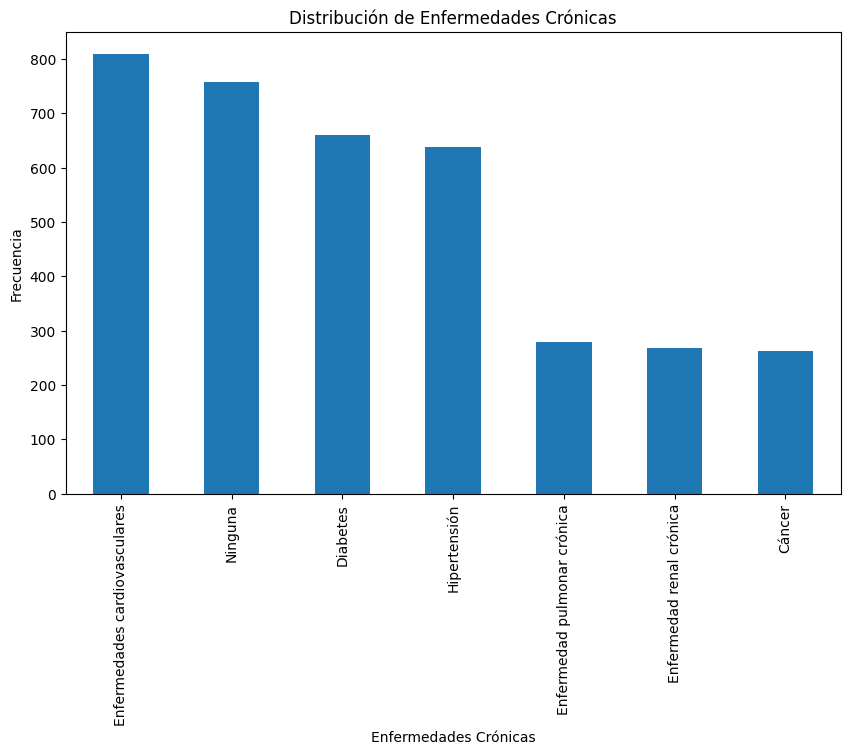

In [ ]:
# Crear un histograma de las enfermedades
conteo_enfermedades.plot(kind='bar', figsize=(10, 6))

# Añadir títulos y etiquetas
plt.title('Distribución de Enfermedades Crónicas')
plt.xlabel('Enfermedades Crónicas')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [ ]:
# Dividir las cadenas de texto en listas de enfermedades
enfermedades = df['Enfermedades crónicas'].str.split(', ')

# Convertir las listas de enfermedades en cadenas de texto con las enfermedades ordenadas alfabéticamente
# Esto asegura que 'Enfermedad A, Enfermedad B' y 'Enfermedad B, Enfermedad A' se consideren la misma combinación
enfermedades = enfermedades.apply(lambda x: ', '.join(sorted(x)))

# Contar las ocurrencias de cada combinación de enfermedades
conteo_combinaciones = enfermedades.value_counts()

print(conteo_combinaciones)

Enfermedades crónicas
Ninguna                                                                                 758
Diabetes, Enfermedades cardiovasculares                                                 236
Diabetes, Enfermedades cardiovasculares, Hipertensión                                   173
Enfermedades cardiovasculares, Hipertensión                                             163
Diabetes, Hipertensión                                                                   91
Cáncer, Enfermedad pulmonar crónica                                                      57
Cáncer, Enfermedad pulmonar crónica, Enfermedad renal crónica                            39
Enfermedad renal crónica, Enfermedades cardiovasculares, Hipertensión                    33
Diabetes, Enfermedad renal crónica, Enfermedades cardiovasculares                        32
Cáncer, Enfermedad pulmonar crónica, Hipertensión                                        26
Enfermedades cardiovasculares                             

In [ ]:
# Dividir las cadenas de texto en listas de medicamentos
medicamentos = df['Medicamentos actuales'].str.split(', ')

# Aplanar las listas y convertirlas en una serie
medicamentos = pd.Series([medicamentos for lista in medicamentos for medicamentos in lista])

# Contar las ocurrencias de cada enfermedad
conteo_medicamentos = medicamentos.value_counts()

print(conteo_medicamentos)

Atorvastatina (20 mg)        724
Losartán (100 mg)            581
Aspirina (100 mg)            410
Ninguno                      353
Aspirina (10 mg)             350
Metformina (500 mg)          332
Insulina (200 UI)            327
Omeprazol (20 mg)            318
Salbutamol (1 inhalación)    280
Name: count, dtype: int64


In [ ]:
# Dividir las cadenas de texto en listas de medicamentos
medicamentos = df['Medicamentos actuales'].str.split(', ')

# Convertir las listas de medicamentos en cadenas de texto con los medicamentos ordenados alfabéticamente
# Esto asegura que 'Medicamento A, Medicamento B' y 'Medicamento B, Medicamento A' se consideren la misma combinación
medicamentos = medicamentos.apply(lambda x: ', '.join(sorted(x)))

# Contar las ocurrencias de cada combinación de medicamentos
conteo_combinaciones = medicamentos.value_counts()

print(conteo_combinaciones)

Medicamentos actuales
Aspirina (10 mg)                                             261
Ninguno                                                      255
Omeprazol (20 mg)                                            243
Atorvastatina (20 mg), Metformina (500 mg)                    91
Atorvastatina (20 mg), Insulina (200 UI)                      76
                                                            ... 
Losartán (100 mg), Metformina (500 mg), Omeprazol (20 mg)      1
Metformina (500 mg), Ninguno                                   1
Metformina (500 mg), Omeprazol (20 mg)                         1
Aspirina (10 mg), Aspirina (100 mg), Insulina (200 UI)         1
Losartán (100 mg), Losartán (100 mg), Ninguno                  1
Name: count, Length: 109, dtype: int64


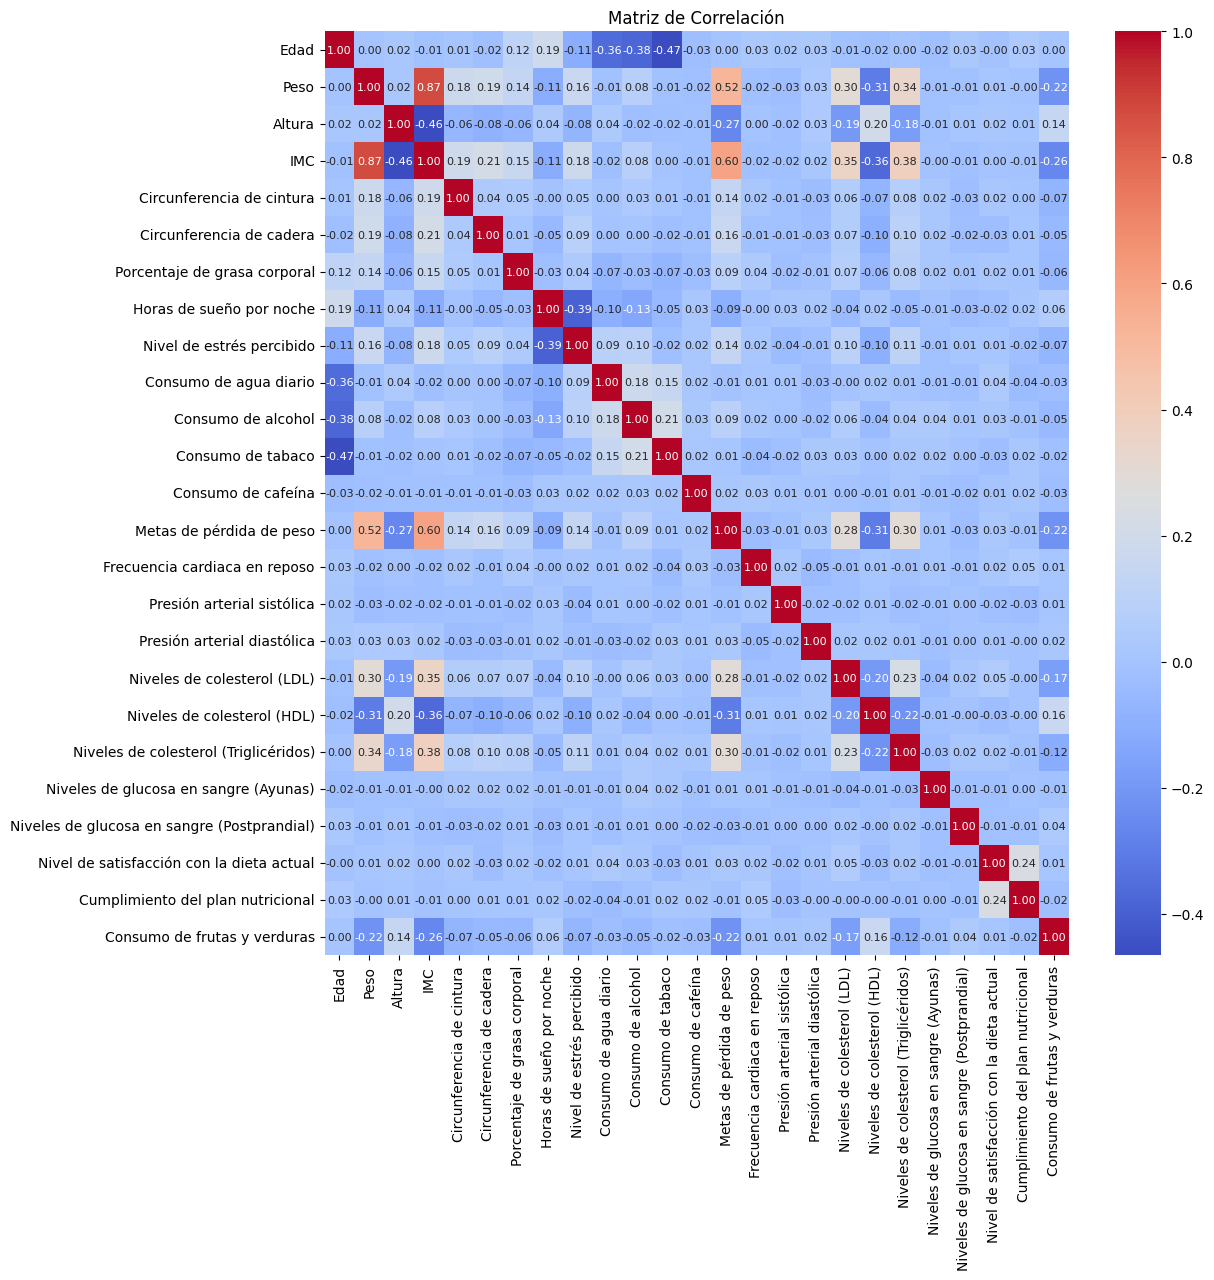

In [ ]:
# 2. Matriz de correlación
#Selecciona las columnas numéricas del dataframe
df_numerico = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = df_numerico.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2F", annot_kws={'size':8})
plt.title('Matriz de Correlación')
plt.show()

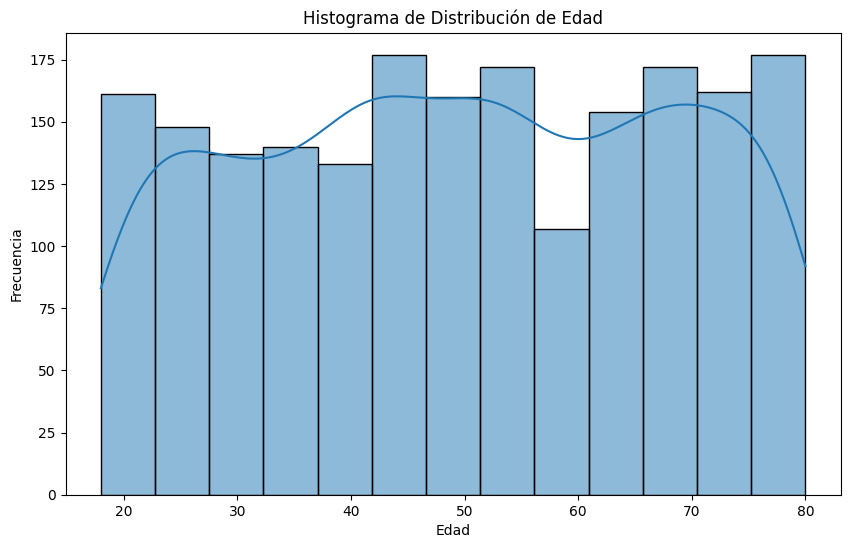

In [ ]:
# 3. Histograma de distribución de Edad
plt.figure(figsize=(10, 6))
sns.histplot(df['Edad'], kde=True)
plt.title('Histograma de Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

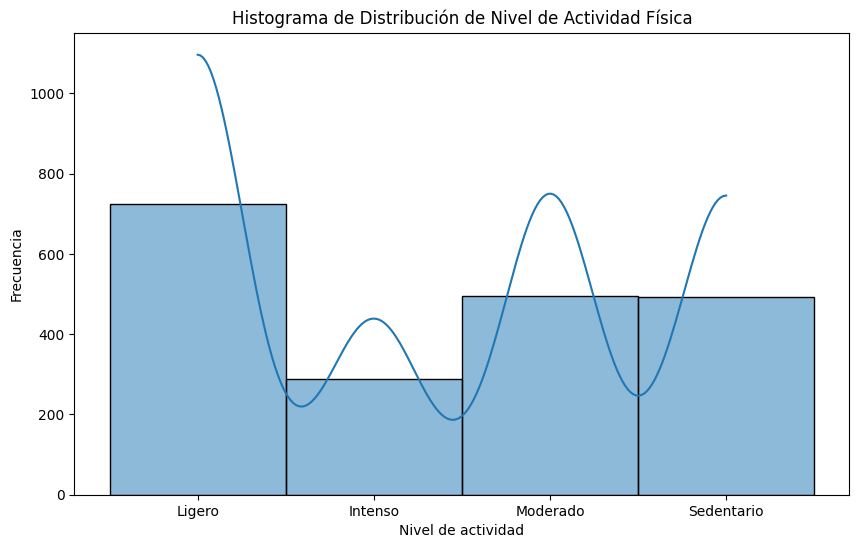

In [ ]:
# 3. Histograma de Activiadd Fisica
plt.figure(figsize=(10, 6))
sns.histplot(df['Nivel de actividad física'], kde=True)
plt.title('Histograma de Distribución de Nivel de Actividad Física')
plt.xlabel('Nivel de actividad')
plt.ylabel('Frecuencia')
plt.show()

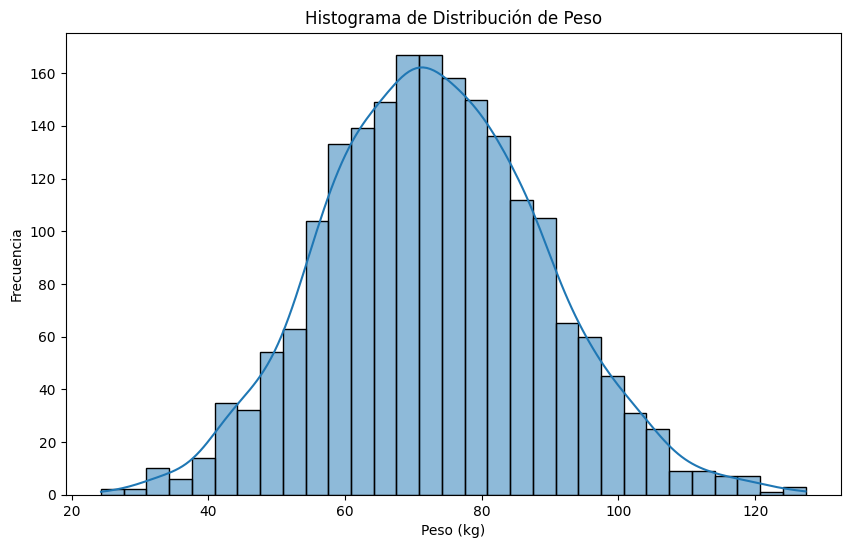

In [ ]:
# 3. Histograma de distribución de Peso
plt.figure(figsize=(10, 6))
sns.histplot(df['Peso'], kde=True)
plt.title('Histograma de Distribución de Peso')
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
#Personas en cada categoria IMC
categorias_imc = ['Bajo peso', 'Peso normal', 'Pre-obesidad o Sobrepeso', 'Obesidad clase I', 'Obesidad clase II', 'Obesidad clase III']
rangos_imc = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]

df['Categoria_IMC'] = pd.cut(df['IMC'], bins=rangos_imc, labels=categorias_imc)
conteo_categorias = df['Categoria_IMC'].value_counts().reindex(categorias_imc, fill_value=0)

print(conteo_categorias)


Categoria_IMC
Bajo peso                   269
Peso normal                 712
Pre-obesidad o Sobrepeso    577
Obesidad clase I            283
Obesidad clase II           123
Obesidad clase III           36
Name: count, dtype: int64


In [ ]:
total_obesidad = 276 + 119 + 51  # Suma de Obesidad clase I, II y III
total_casos = 259 + 752 + 543 + 276 + 119 + 51  # Suma de todas las categorías

porcentaje_obesidad = (total_obesidad / total_casos) * 100
print(porcentaje_obesidad)

22.3


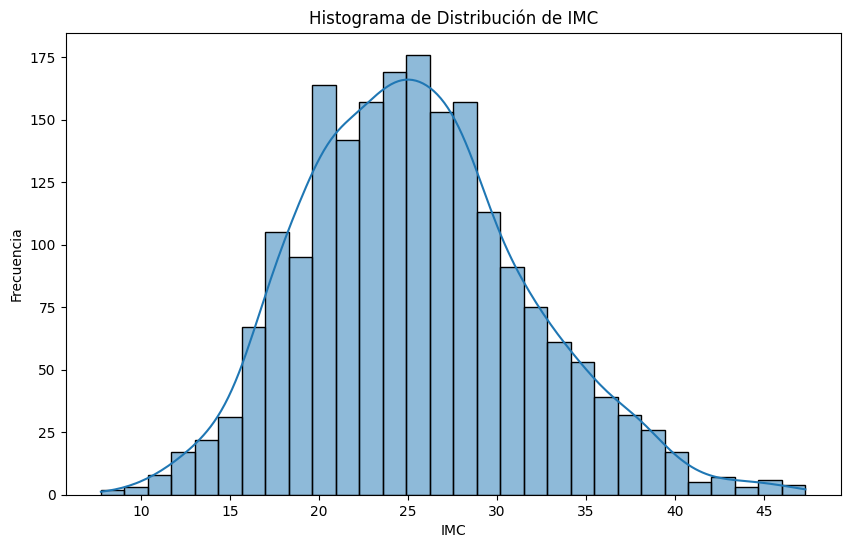

In [ ]:
# 3. Histograma de distribución de IMC
plt.figure(figsize=(10, 6))
sns.histplot(df['IMC'], kde=True)
plt.title('Histograma de Distribución de IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()

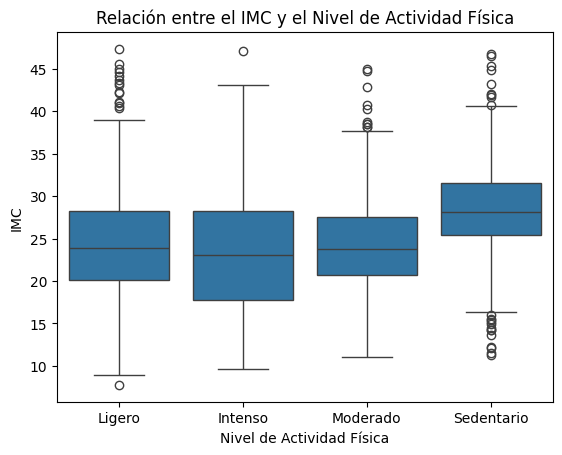

In [ ]:
# Visualizar la relación entre el IMC y el nivel de actividad física
sns.boxplot(x='Nivel de actividad física', y='IMC', data=df)
plt.title('Relación entre el IMC y el Nivel de Actividad Física')
plt.xlabel('Nivel de Actividad Física')
plt.ylabel('IMC')
plt.show()

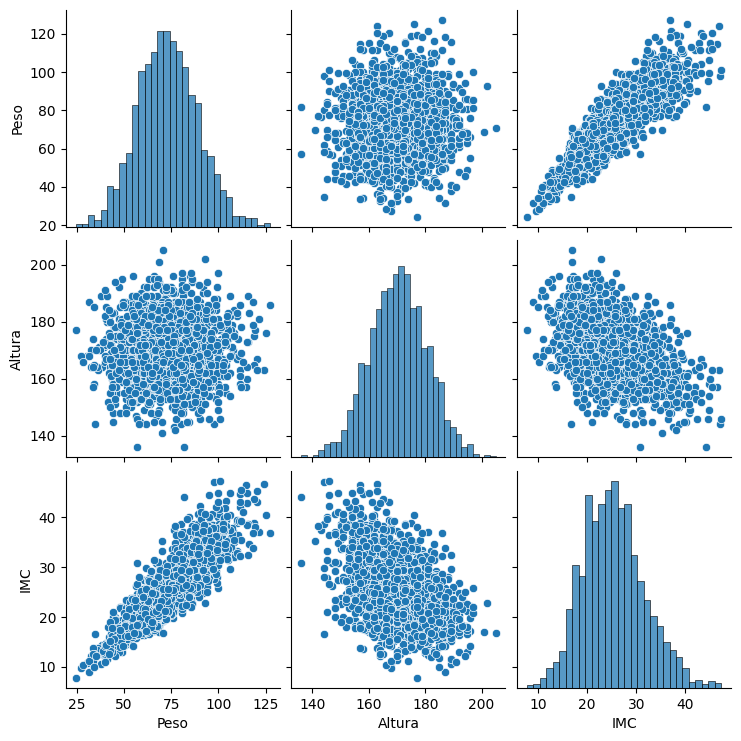

In [ ]:
# Relaciones por pares entre 'Peso', 'Altura' e 'IMC'
sns.pairplot(df[['Peso', 'Altura', 'IMC']])
plt.show()

### Ejemplo 2: Diagrama de dispersión entre IMC y edad


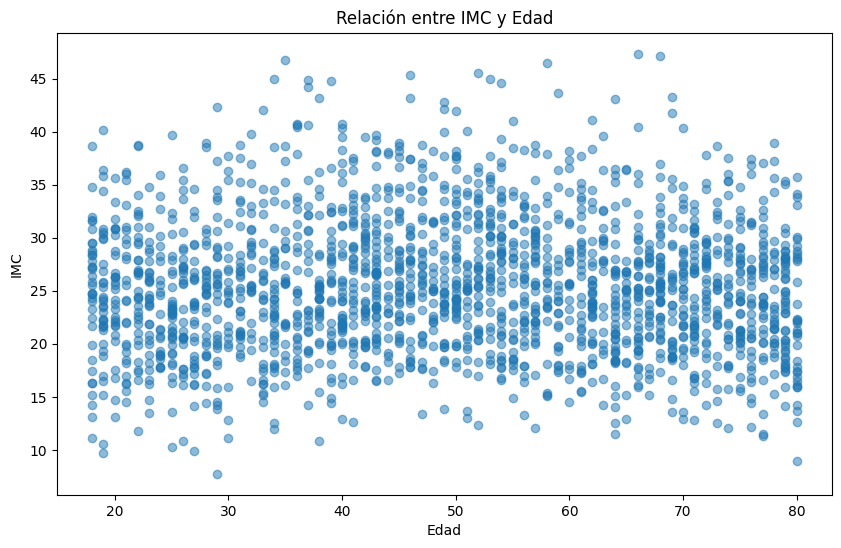

In [ ]:
# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['Edad'], df['IMC'], alpha=0.5)
plt.title('Relación entre IMC y Edad')
plt.xlabel('Edad')
plt.ylabel('IMC')
plt.show()

###Verificaciones para la generacion de enfermedades

In [ ]:
# Verificar la longitud de enfermedades_cronicas
print("Longitud de enfermedades_cronicas:", len(enfermedades_cronicas))

# Asegurarse de que la longitud de enfermedades_cronicas es al menos cantidad_datos
assert len(enfermedades_cronicas) >= cantidad_datos, "La longitud de enfermedades_cronicas es menor que cantidad_datos"

# Ahora puedes usar enfermedades_cronicas en generar_medicamentos_actuales
medicamentos_actuales = generar_medicamentos_actuales(enfermedades_cronicas)

# Contar las enfermedades únicas
num_enfermedades_unicas = enfermedades.nunique()

print('Número de enfermedades únicas:', num_enfermedades_unicas)

# Dividir las cadenas de texto en listas de enfermedades
enfermedades = [ec.split(', ') for ec in enfermedades_cronicas]

# Aplanar las listas y convertirlas en una lista
enfermedades = [enfermedad for lista in enfermedades for enfermedad in lista]

# Contar las ocurrencias de cada enfermedad
conteo_enfermedades = pd.Series(enfermedades).value_counts()

print(conteo_enfermedades)

# Convertir las listas de enfermedades en cadenas de texto con las enfermedades ordenadas alfabéticamente
# Esto asegura que 'Enfermedad A, Enfermedad B' y 'Enfermedad B, Enfermedad A' se consideren la misma combinación
enfermedades = [', '.join(sorted(ec.split(', '))) for ec in enfermedades_cronicas]

# Contar las ocurrencias de cada combinación de enfermedades
conteo_combinaciones = pd.Series(enfermedades).value_counts()

print(conteo_combinaciones)

conteo = df.apply(lambda row: ((row['IMC'] < 18.5) and ('Diabetes' in row['Enfermedades crónicas'])), axis=1).value_counts()
print(conteo)

#  Creación de una Aplicación de Predicción de Enfermedades Crónicas con Streamlit

En esta sección, presentamos un código base que los estudiantes del diplomado pueden utilizar como referencia para crear una aplicación interactiva utilizando Streamlit. El código base emplea un clasificador de Bosque Aleatorio (Random Forest Classifier) para predecir la probabilidad de padecer enfermedades crónicas.

Los estudiantes del diplomado tienen la tarea de seleccionar las variables del conjunto de datos proporcionado, basándose en un análisis previo. Estas variables se utilizarán como características (features) para entrenar el modelo de clasificación. Luego, podrán personalizar la interfaz de usuario de la aplicación y la lógica del modelo según sus necesidades específicas, creando así su propia aplicación de predicción de enfermedades crónicas.

## Construcción del modelo

### Modelo 1: Un modelo para todas las enfermedades

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import multilabel_confusion_matrix

# Cargar datos simulados desde CSV
df = pd.read_csv('datos_simulados.csv')

'''
# Crear una nueva columna para cada enfermedad
for enfermedad in ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']:
    df[enfermedad] = df['Enfermedades crónicas'].apply(lambda x: int(enfermedad in x))

# Ahora puedes eliminar la columna original 'Enfermedades crónicas'
df = df.drop(columns=['Enfermedades crónicas'])
'''

# Definir las características (features) y la variable objetivo
X = df.drop(columns=['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica'])  # Características
y = df[['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']]  # Variable objetivo

# Crear una lista con los nombres de las enfermedades
enfermedades_cronicas = ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']

# Identificar columnas con variables categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Aplicar codificación one-hot a las variables categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar el clasificador Random Forest y entrenar el modelo
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth = 20, min_samples_split=2, random_state=42)
multi_label_classifier = MultiOutputClassifier(rf_classifier)
multi_label_classifier.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = multi_label_classifier.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Imprimir el reporte de clasificación y la matriz de confusión
print("\Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names = enfermedades_cronicas, zero_division=1))

# Generar una matriz de confusión para cada etiqueta
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Imprimir las matrices de confusión
for i, matrix in enumerate(confusion_matrices):
    print(f"Matriz de confusión para la etiqueta {y.columns[i]}:")
    print(matrix)
    print("\n")


Accuracy: 0.535
\Reporte de Clasificación:
                               precision    recall  f1-score   support

                     Diabetes       0.75      0.75      0.75       141
                 Hipertensión       0.65      0.58      0.61       128
                       Cáncer       1.00      0.07      0.13        56
Enfermedades cardiovasculares       0.71      0.87      0.78       164
     Enfermedad renal crónica       1.00      0.00      0.00        51
  Enfermedad pulmonar crónica       1.00      0.16      0.27        63

                    micro avg       0.71      0.56      0.63       603
                    macro avg       0.85      0.40      0.42       603
                 weighted avg       0.79      0.56      0.56       603
                  samples avg       0.85      0.73      0.72       603

Matriz de confusión para la etiqueta Diabetes:
[[223  36]
 [ 35 106]]


Matriz de confusión para la etiqueta Hipertensión:
[[232  40]
 [ 54  74]]


Matriz de confusión para 

### Modelo 2: Un modelo para todas las enfermedades (Elimina caracteristicas menores)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import multilabel_confusion_matrix

'''
# Cargar datos simulados desde CSV
df = pd.read_csv('datos_simulados.csv')

# Crear una nueva columna para cada enfermedad
for enfermedad in ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']:
    df[enfermedad] = df['Enfermedades crónicas'].apply(lambda x: int(enfermedad in x))

# Ahora puedes eliminar la columna original 'Enfermedades crónicas'
df = df.drop(columns=['Enfermedades crónicas'])
'''
40
# Definir las características (features) y la variable objetivo
X = df.drop(columns=['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica'])  # Características
y = df[['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']]  # Variable objetivo

# Crear una lista con los nombres de las enfermedades
enfermedades_cronicas = ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']

# Identificar columnas con variables categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Aplicar codificación one-hot a las variables categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Entrenar el modelo y calcular la importancia de las características
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, random_state=42)
rf_classifier.fit(X_train, y_train)
importances = rf_classifier.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Crear una lista de las características de baja importancia
low_importance_features = feature_importances[feature_importances['importance'] < 0.00001]['feature'].tolist()

# Eliminar las características de baja importancia de tus datos
X_train = X_train.drop(columns=low_importance_features)
X_test = X_test.drop(columns=low_importance_features)

# Crear un muestreador para el sobremuestreo
over_sampler = RandomOverSampler(sampling_strategy='minority')

# Crear un muestreador para el submuestreo
under_sampler = RandomUnderSampler(sampling_strategy='majority')

# Inicializar el clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, random_state=42)

# Inicializar el MultiOutputClassifier con el clasificador Random Forest
multi_label_classifier = MultiOutputClassifier(rf_classifier)

# Entrenar el MultiOutputClassifier
multi_label_classifier.fit(X_train, y_train)

# Inicializar el clasificador Random Forest y entrenar el modelo
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth = 20, min_samples_split=2, random_state=42)
multi_label_classifier = MultiOutputClassifier(rf_classifier)
multi_label_classifier.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = multi_label_classifier.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Imprimir el reporte de clasificación y la matriz de confusión
print("\Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names = enfermedades_cronicas, zero_division=1))

# Generar una matriz de confusión para cada etiqueta
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Imprimir las matrices de confusión
for i, matrix in enumerate(confusion_matrices):
    print(f"Matriz de confusión para la etiqueta {y.columns[i]}:")
    print(matrix)
    print("\n")

Accuracy: 0.525
\Reporte de Clasificación:
                               precision    recall  f1-score   support

                     Diabetes       0.75      0.76      0.76       141
                 Hipertensión       0.68      0.63      0.65       128
                       Cáncer       1.00      0.11      0.19        56
Enfermedades cardiovasculares       0.72      0.87      0.79       164
     Enfermedad renal crónica       1.00      0.02      0.04        51
  Enfermedad pulmonar crónica       1.00      0.19      0.32        63

                    micro avg       0.73      0.58      0.65       603
                    macro avg       0.86      0.43      0.46       603
                 weighted avg       0.80      0.58      0.58       603
                  samples avg       0.87      0.75      0.73       603

Matriz de confusión para la etiqueta Diabetes:
[[224  35]
 [ 34 107]]


Matriz de confusión para la etiqueta Hipertensión:
[[233  39]
 [ 47  81]]


Matriz de confusión para 

### Mejorar parámetros del modelo

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30]
}

# Inicializar el clasificador Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Inicializar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Ajustar la búsqueda en cuadrícula a los datos
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_

print("Mejores parámetros: ", best_params)

Mejores parámetros:  {'max_depth': None, 'min_samples_split': 25, 'n_estimators': 500}


### Modelo 3: Un modelo para cada enfermedad

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import multilabel_confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


# Cargar datos simulados desde CSV
df = pd.read_csv('datos_simulados.csv')

# Crear una nueva columna para cada enfermedad
for enfermedad in ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']:
    df[enfermedad] = df['Enfermedades crónicas'].apply(lambda x: int(enfermedad in x))

# Ahora puedes eliminar la columna original 'Enfermedades crónicas'
df = df.drop(columns=['Enfermedades crónicas'])


# Definir las características (features) y la variable objetivo
X = df.drop(columns=['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica'])  # Características
y = df[['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']]  # Variable objetivo

# Crear una lista con los nombres de las enfermedades
enfermedades_cronicas = ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']

# Identificar columnas con variables categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Aplicar codificación one-hot a las variables categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Crear un diccionario para almacenar los modelos para cada enfermedad
models = {}

# Para cada enfermedad
for enfermedad in enfermedades_cronicas:
    # Definir la variable objetivo para esta enfermedad
    y_train_enfermedad = y_train[enfermedad]
    # Entrenar el modelo
    X_train_res, y_train_res = X_train, y_train_enfermedad

    # Inicializar el clasificador Random Forest y entrenar el modelo
    rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=25, random_state=42)
    rf_classifier.fit(X_train_res, y_train_res)

    # Almacenar el modelo entrenado en el diccionario
    models[enfermedad] = rf_classifier

# Inicializar el clasificador Random Forest y entrenar el modelo
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth = None, min_samples_split=25, random_state=42)
multi_label_classifier = MultiOutputClassifier(rf_classifier)
multi_label_classifier.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = multi_label_classifier.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Imprimir el reporte de clasificación y la matriz de confusión
print("\Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names = enfermedades_cronicas, zero_division=1))

# Generar una matriz de confusión para cada etiqueta
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Imprimir las matrices de confusión
for i, matrix in enumerate(confusion_matrices):
    print(f"Matriz de confusión para la etiqueta {y.columns[i]}:")
    print(matrix)
    print("\n")

Accuracy: 0.55
\Reporte de Clasificación:
                               precision    recall  f1-score   support

                     Diabetes       0.76      0.77      0.76       141
                 Hipertensión       0.73      0.66      0.69       128
                       Cáncer       1.00      0.12      0.22        56
Enfermedades cardiovasculares       0.73      0.87      0.79       164
     Enfermedad renal crónica       1.00      0.02      0.04        51
  Enfermedad pulmonar crónica       1.00      0.16      0.27        63

                    micro avg       0.75      0.59      0.66       603
                    macro avg       0.87      0.43      0.46       603
                 weighted avg       0.81      0.59      0.59       603
                  samples avg       0.88      0.75      0.74       603

Matriz de confusión para la etiqueta Diabetes:
[[224  35]
 [ 33 108]]


Matriz de confusión para la etiqueta Hipertensión:
[[241  31]
 [ 44  84]]


Matriz de confusión para l

### Búsqueda de características más importantes

In [ ]:
# Entrenar el modelo
rf_classifier.fit(X_train, y_train)

# Obtener la importancia de las características
importances = rf_classifier.feature_importances_

# Crear un DataFrame para visualizar las importancias
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Ordenar el DataFrame por importancia de las características
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Cambiar la configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Imprimir las características y su importancia
print(feature_importances)
print()

# Crear una lista con los rangos de importancia que quieres explorar
rangos = [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 0]

# Crear una lista para almacenar los conteos
conteos = []

# Para cada rango
for rango in rangos:
    # Contar cuántas características tienen una importancia mayor o igual a ese rango
    conteo = (feature_importances['importance'] >= rango).sum()
# Imprimir el rango y el conteo
    print(f'Rango: {rango}, Conteo: {conteo}')

                                               feature    importance
3                                                  IMC  1.401809e-01
1                                                 Peso  7.159333e-02
13                            Metas de pérdida de peso  5.406847e-02
271                      Medicamentos actuales_Ninguno  3.378940e-02
76              Medicamentos actuales_Aspirina (10 mg)  3.376308e-02
285            Medicamentos actuales_Omeprazol (20 mg)  3.151315e-02
17                         Niveles de colesterol (LDL)  3.009586e-02
18                         Niveles de colesterol (HDL)  2.950374e-02
19               Niveles de colesterol (Triglicéridos)  2.738560e-02
0                                                 Edad  2.421564e-02
2                                               Altura  2.110043e-02
135  Medicamentos actuales_Atorvastatina (20 mg), A...  1.379988e-02
71                       Hábitos alimenticios_Omnívora  1.303713e-02
5                             Circ

### Modelo 4: Un modelo para cada enfermedad (Elimina caracteristicas menores)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import multilabel_confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
'''
# Cargar datos simulados desde CSV
df = pd.read_csv('datos_simulados.csv')

# Crear una nueva columna para cada enfermedad
for enfermedad in ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']:
    df[enfermedad] = df['Enfermedades crónicas'].apply(lambda x: int(enfermedad in x))

# Ahora puedes eliminar la columna original 'Enfermedades crónicas'
df = df.drop(columns=['Enfermedades crónicas'])
'''
# Definir las características (features) y la variable objetivo
X = df.drop(columns=['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica'])  # Características
y = df[['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']]  # Variable objetivo

# Crear una lista con los nombres de las enfermedades
enfermedades_cronicas = ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']

# Identificar columnas con variables categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Aplicar codificación one-hot a las variables categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Entrenar el modelo y calcular la importancia de las características
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=25, random_state=42)
rf_classifier.fit(X_train, y_train)
importances = rf_classifier.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Crear una lista de las características de baja importancia
low_importance_features = feature_importances[feature_importances['importance'] < 0.0001]['feature'].tolist()

# Eliminar las características de baja importancia de tus datos
X_train = X_train.drop(columns=low_importance_features)
X_test = X_test.drop(columns=low_importance_features)

# Crear un diccionario para almacenar los modelos para cada enfermedad
models = {}

# Para cada enfermedad
for enfermedad in enfermedades_cronicas:
    # Definir la variable objetivo para esta enfermedad
    y_train_enfermedad = y_train[enfermedad]

    # Entrenar el Modelo
    X_train_res, y_train_res = X_train, y_train_enfermedad

    # Inicializar el clasificador Random Forest y entrenar el modelo
    rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=25, random_state=42)
    rf_classifier.fit(X_train_res, y_train_res)

    # Almacenar el modelo entrenado en el diccionario
    models[enfermedad] = rf_classifier

# Inicializar el clasificador Random Forest y entrenar el modelo
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=25, random_state=42)
multi_label_classifier = MultiOutputClassifier(rf_classifier)
multi_label_classifier.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = multi_label_classifier.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Imprimir el reporte de clasificación y la matriz de confusión
print("\Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names = enfermedades_cronicas, zero_division=1))

# Generar una matriz de confusión para cada etiqueta
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Imprimir las matrices de confusión
for i, matrix in enumerate(confusion_matrices):
    print(f"Matriz de confusión para la etiqueta {y.columns[i]}:")
    print(matrix)
    print("\n")

Accuracy: 0.5675
\Reporte de Clasificación:
                               precision    recall  f1-score   support

                     Diabetes       0.77      0.79      0.78       141
                 Hipertensión       0.70      0.68      0.69       128
                       Cáncer       1.00      0.18      0.30        56
Enfermedades cardiovasculares       0.73      0.88      0.80       164
     Enfermedad renal crónica       1.00      0.02      0.04        51
  Enfermedad pulmonar crónica       1.00      0.22      0.36        63

                    micro avg       0.75      0.61      0.67       603
                    macro avg       0.87      0.46      0.50       603
                 weighted avg       0.81      0.61      0.62       603
                  samples avg       0.87      0.77      0.76       603

Matriz de confusión para la etiqueta Diabetes:
[[226  33]
 [ 30 111]]


Matriz de confusión para la etiqueta Hipertensión:
[[235  37]
 [ 41  87]]


Matriz de confusión para

### Evaluación y selección del modelo

In [ ]:
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon

# Listas de precisiones, una para cada modelo
precisiones_modelo1 = [0.75, 0.65, 1.00, 0.71, 1.00, 1.00]
precisiones_modelo2 = [0.75, 0.68, 1.00, 0.72, 1.00, 1.00]
precisiones_modelo3 = [0.76, 0.73, 1.00, 0.73, 1.00, 1.00]
precisiones_modelo4 = [0.77, 0.70, 1.00, 0.73, 1.00, 1.00]

# Realizar la prueba de Friedman
stat, p = friedmanchisquare(precisiones_modelo1, precisiones_modelo2, precisiones_modelo3, precisiones_modelo4)

print('Estadística=%.3f, p=%.3f' % (stat, p))

# Interpretar
alpha = 0.05
if p > alpha:
    print('Las diferencias entre los modelos no son estadísticamente significativas (no rechazamos H0)')
else:
    print('Las diferencias entre los modelos son estadísticamente significativas (rechazamos H0)')

# Comparar el modelo 1 y el modelo 2
stat, p = wilcoxon(precisiones_modelo1, precisiones_modelo2)
print('Modelo 1 vs Modelo 2: Estadística=%.3f, p=%.3f' % (stat, p))

# Comparar el modelo 1 y el modelo 3
stat, p = wilcoxon(precisiones_modelo1, precisiones_modelo3)
print('Modelo 1 vs Modelo 3: Estadística=%.3f, p=%.3f' % (stat, p))

# Comparar el modelo 1 y el modelo 4
stat, p = wilcoxon(precisiones_modelo1, precisiones_modelo4)
print('Modelo 1 vs Modelo 4: Estadística=%.3f, p=%.3f' % (stat, p))

# Comparar el modelo 2 y el modelo 3
stat, p = wilcoxon(precisiones_modelo2, precisiones_modelo3)
print('Modelo 2 vs Modelo 3: Estadística=%.3f, p=%.3f' % (stat, p))

# Comparar el modelo 2 y el modelo 4
stat, p = wilcoxon(precisiones_modelo2, precisiones_modelo4)
print('Modelo 2 vs Modelo 4: Estadística=%.3f, p=%.3f' % (stat, p))

# Comparar el modelo 3 y el modelo 4
stat, p = wilcoxon(precisiones_modelo3, precisiones_modelo4)
print('Modelo 3 vs Modelo 4: Estadística=%.3f, p=%.3f' % (stat, p))


Estadística=8.143, p=0.043
Las diferencias entre los modelos son estadísticamente significativas (rechazamos H0)
Modelo 1 vs Modelo 2: Estadística=0.000, p=0.180
Modelo 1 vs Modelo 3: Estadística=0.000, p=0.109
Modelo 1 vs Modelo 4: Estadística=0.000, p=0.102
Modelo 2 vs Modelo 3: Estadística=0.000, p=0.102
Modelo 2 vs Modelo 4: Estadística=0.000, p=0.109
Modelo 3 vs Modelo 4: Estadística=1.000, p=0.655


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [ ]:
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon

# Listas de recalls, una para cada modelo
recall_modelo1 = [0.75, 0.58, 0.07, 0.87, 0.00, 0.16]
recall_modelo2 = [0.76, 0.63, 0.11, 0.87, 0.02, 0.19]
recall_modelo3 = [0.77, 0.66, 0.12, 0.87, 0.02, 0.16]
recall_modelo4 = [0.79, 0.68, 0.18, 0.88, 0.02, 0.16]

# Realizar la prueba de Friedman
stat, p = friedmanchisquare(recall_modelo1, recall_modelo2, recall_modelo3, recall_modelo4)

print('Estadística=%.3f, p=%.3f' % (stat, p))

# Interpretar
alpha = 0.05
if p > alpha:
    print('Las diferencias entre los modelos no son estadísticamente significativas (no rechazamos H0)')
else:
    print('Las diferencias entre los modelos son estadísticamente significativas (rechazamos H0)')

# Comparar el modelo 1 y el modelo 2
stat, p = wilcoxon(recall_modelo1, recall_modelo2)
print('Modelo 1 vs Modelo 2: Estadística=%.3f, p=%.3f' % (stat, p))

# Comparar el modelo 1 y el modelo 3
stat, p = wilcoxon(recall_modelo1, recall_modelo3)
print('Modelo 1 vs Modelo 3: Estadística=%.3f, p=%.3f' % (stat, p))

# Comparar el modelo 1 y el modelo 4
stat, p = wilcoxon(recall_modelo1, recall_modelo4)
print('Modelo 1 vs Modelo 4: Estadística=%.3f, p=%.3f' % (stat, p))

# Comparar el modelo 2 y el modelo 3
stat, p = wilcoxon(recall_modelo2, recall_modelo3)
print('Modelo 2 vs Modelo 3: Estadística=%.3f, p=%.3f' % (stat, p))

# Comparar el modelo 2 y el modelo 4
stat, p = wilcoxon(recall_modelo2, recall_modelo4)
print('Modelo 2 vs Modelo 4: Estadística=%.3f, p=%.3f' % (stat, p))

# Comparar el modelo 3 y el modelo 4
stat, p = wilcoxon(recall_modelo3, recall_modelo4)
print('Modelo 3 vs Modelo 4: Estadística=%.3f, p=%.3f' % (stat, p))


Estadística=10.750, p=0.013
Las diferencias entre los modelos son estadísticamente significativas (rechazamos H0)
Modelo 1 vs Modelo 2: Estadística=0.000, p=0.043
Modelo 1 vs Modelo 3: Estadística=0.000, p=0.068
Modelo 1 vs Modelo 4: Estadística=0.000, p=0.043
Modelo 2 vs Modelo 3: Estadística=3.000, p=0.465
Modelo 2 vs Modelo 4: Estadística=2.000, p=0.138
Modelo 3 vs Modelo 4: Estadística=0.000, p=0.066


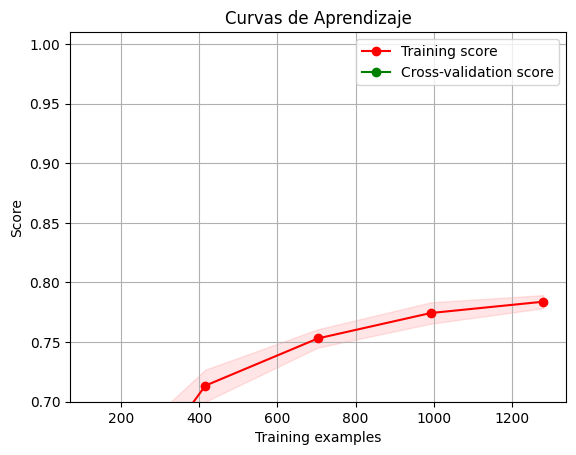

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Definir una función para trazar las curvas de aprendizaje
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Trazar las curvas de aprendizaje
plot_learning_curve(multi_label_classifier, "Curvas de Aprendizaje", X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

# Mostrar el gráfico
plt.show()

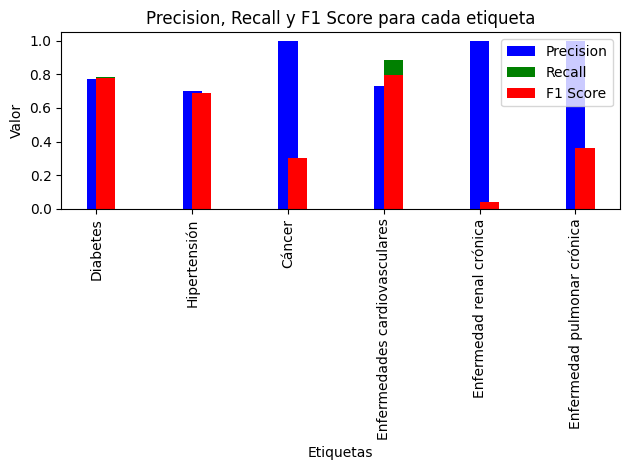

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

# Calcular las métricas para cada etiqueta
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Crear los gráficos de barras
labels = ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']
x = range(len(labels))

plt.bar(x, precision, width=0.2, label='Precision', color='b', align='center')
plt.bar(x, recall, width=0.2, label='Recall', color='g', align='edge')
plt.bar(x, f1, width=0.2, label='F1 Score', color='r', align='edge')

plt.xlabel('Etiquetas')
plt.ylabel('Valor')
plt.title('Precision, Recall y F1 Score para cada etiqueta')
plt.xticks(x, labels, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()


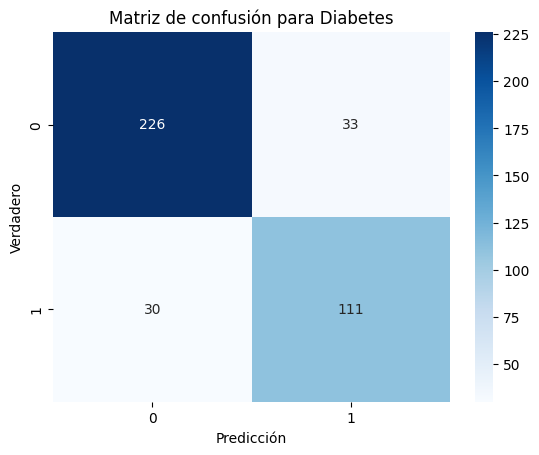

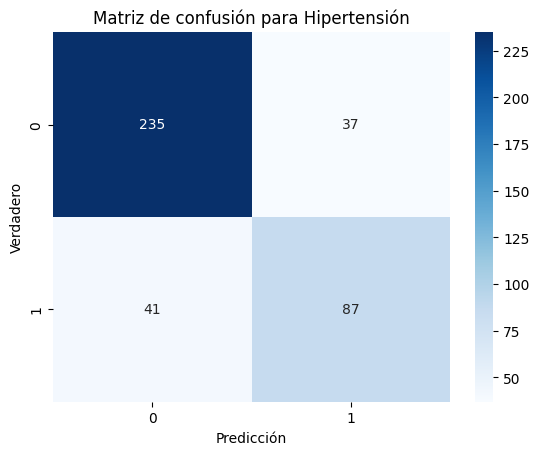

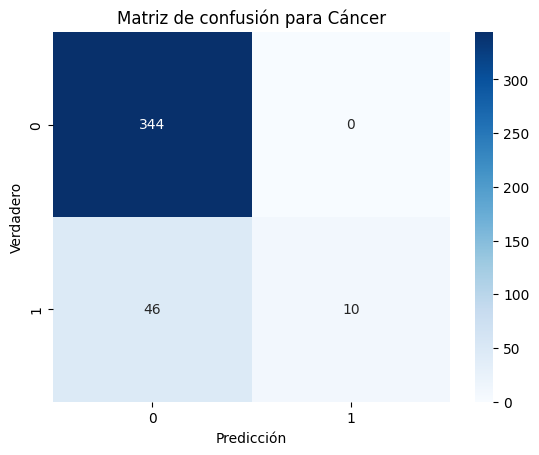

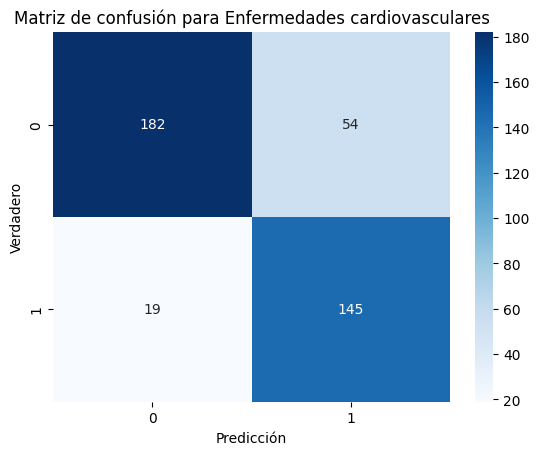

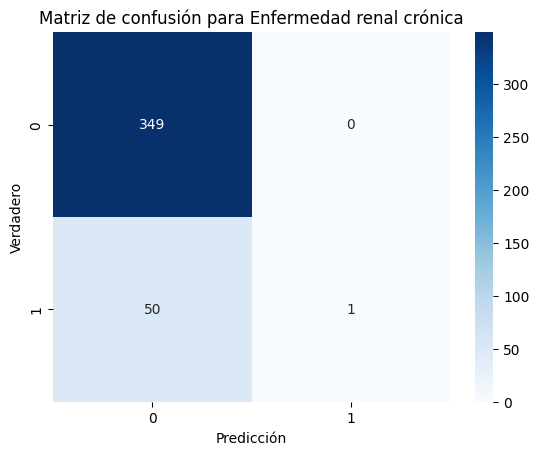

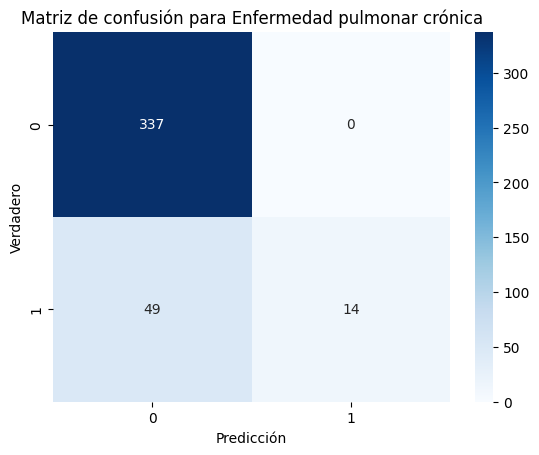

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión para cada etiqueta
for i, enfermedad in enumerate(enfermedades_cronicas):
    matriz_confusion = confusion_matrix(y_test[enfermedad], y_pred[:, i])
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de confusión para {enfermedad}')
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.show()


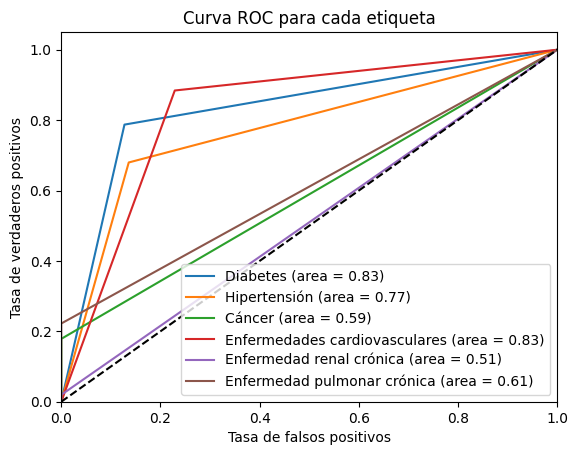

In [ ]:
# Calcular y dibujar la curva ROC para cada etiqueta
for i, enfermedad in enumerate(enfermedades_cronicas):
    fpr, tpr, _ = roc_curve(y_test[enfermedad], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{enfermedad} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC para cada etiqueta')
plt.legend(loc="lower right")
plt.show()


## Selección de características del modelo para Streamlit

### Importar y preparar los datos para el modelo

In [1]:
# Obtener el dataset desde GitHub
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://github.com/olossi/DCDD2024/raw/main/Modulo%202/Nutriologos/datos_simulados.csv

Edad,Peso,Altura,IMC,Circunferencia de cintura,Circunferencia de cadera,Porcentaje de grasa corporal,Historial médico familiar,Nivel de actividad física,Hábitos alimenticios,Horas de sueño por noche,Nivel de estrés percibido,Consumo de agua diario,Consumo de alcohol,Consumo de tabaco,Consumo de cafeína,Enfermedades crónicas,Medicamentos actuales,Metas de pérdida de peso,Frecuencia cardiaca en reposo,Presión arterial sistólica,Presión arterial diastólica,Niveles de colesterol (LDL),Niveles de colesterol (HDL),Niveles de colesterol (Triglicéridos),Niveles de glucosa en sangre (Ayunas),Niveles de glucosa en sangre (Postprandial),Sensibilidad a alimentos,Nivel de satisfacción con la dieta actual,Cumplimiento del plan nutricional,Actividades físicas realizadas,Consumo de frutas y verduras,Nivel de conocimiento de nutrición
56,64.42,157.0,26.13,78.0,100.0,33.76,Hipertensión,Ligero,Omnívora,3.0,10,2.2,4.0,9.0,417.7,"Enfermedades cardiovasculares, Enfermedad renal crónica, Hipertensión","Atorv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0curl: (6) Could not resolve host: application
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  523k  100  523k    0     0   260k      0  0:00:02  0:00:02 --:--:--  576k


In [2]:
import pandas as pd
# Cargar datos simulados desde CSV
df = pd.read_csv('datos_simulados.csv')

# Crear una nueva columna para cada enfermedad
for enfermedad in ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']:
    df[enfermedad] = df['Enfermedades crónicas'].apply(lambda x: int(enfermedad in x))

# Ahora puedes eliminar la columna original 'Enfermedades crónicas'
df = df.drop(columns=['Enfermedades crónicas'])

### Modelo 5: Seleccion final de características para Streamlit

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.multioutput import MultiOutputClassifier

# Definir las características (features) y la variable objetivo
X = df.drop(columns=['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica'])  # Características
y = df[['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']]  # Variable objetivo

# Crear una lista con los nombres de las enfermedades
enfermedades_cronicas = ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']

# Identificar columnas con variables categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Aplicar codificación one-hot a las variables categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Entrenar el modelo y calcular la importancia de las características
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=25, random_state=42)
rf_classifier.fit(X_train, y_train)

# Obtener la importancia de las características
importances = rf_classifier.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Crear una lista de las características de baja importancia
low_importance_features = feature_importances[feature_importances['importance'] < 0.0001]['feature'].tolist()

# Eliminar las características de baja importancia de tus datos
X_train = X_train.drop(columns=low_importance_features)
X_test = X_test.drop(columns=low_importance_features)

# Crear un diccionario para almacenar los modelos para cada enfermedad
models = {}

# Crear un diccionario para almacenar las características más importantes para cada enfermedad
caracteristicas_importantes = {}

# Para cada enfermedad
for enfermedad in enfermedades_cronicas:
    # Definir la variable objetivo para esta enfermedad
    y_train_enfermedad = y_train[enfermedad]

    # Entrenar el Modelo
    X_train_res, y_train_res = X_train, y_train_enfermedad

    # Inicializar el clasificador Random Forest y entrenar el modelo
    rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=25, random_state=42)
    rf_classifier.fit(X_train_res, y_train_res)

    # Obtener la importancia de las características
    feature_importances = rf_classifier.feature_importances_
    indices = np.argsort(feature_importances)[::-1]

    # Almacenar el modelo entrenado en el diccionario
    models[enfermedad] = rf_classifier

    # Almacenar las 50 características más importantes en el diccionario
    caracteristicas_importantes[enfermedad] = [X_train.columns[i] for i in indices[:50]]

    # Mostrar las 10 características más importantes
    print(f"\nLas  características más importantes para predecir {enfermedad}:")
    for i in range(10):
      print(f"{i+1}. {X_train.columns[indices[i]]}: {feature_importances[indices[i]]}")

# Inicializar el clasificador Random Forest y entrenar el modelo
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=25, random_state=42)
multi_label_classifier = MultiOutputClassifier(rf_classifier)
multi_label_classifier.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = multi_label_classifier.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print()
print("Accuracy:", accuracy)

# Imprimir el reporte de clasificación y la matriz de confusión
print("\Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names = enfermedades_cronicas, zero_division=1))

# Generar una matriz de confusión para cada etiqueta
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Imprimir las matrices de confusión
for i, matrix in enumerate(confusion_matrices):
    print(f"Matriz de confusión para la etiqueta {y.columns[i]}:")
    print(matrix)
    print("\n")


Las  características más importantes para predecir Diabetes:
1. IMC: 0.1542226747404146
2. Peso: 0.08862115504840327
3. Metas de pérdida de peso: 0.06524256551759729
4. Niveles de colesterol (HDL): 0.03587689267796997
5. Niveles de colesterol (LDL): 0.035260211601330506
6. Niveles de colesterol (Triglicéridos): 0.029577691581958714
7. Altura: 0.02260778290116154
8. Medicamentos actuales_Aspirina (10 mg): 0.02242184133226401
9. Medicamentos actuales_Ninguno: 0.019424534443912105
10. Medicamentos actuales_Metformina (500 mg), Atorvastatina (20 mg): 0.01914544778350178

Las  características más importantes para predecir Hipertensión:
1. IMC: 0.14753601213090026
2. Peso: 0.06450671061382438
3. Metas de pérdida de peso: 0.04462541508322677
4. Niveles de colesterol (HDL): 0.03713146833452114
5. Niveles de colesterol (Triglicéridos): 0.03339511218254864
6. Niveles de colesterol (LDL): 0.029371524282399662
7. Medicamentos actuales_Aspirina (10 mg): 0.026056726771043544
8. Medicamentos actuale

In [ ]:
# Encontrar las características comunes a todas las listas
caracteristicas_comunes = set(caracteristicas_importantes[enfermedades_cronicas[0]])
for enfermedad in enfermedades_cronicas[1:]:
    caracteristicas_comunes.intersection_update(caracteristicas_importantes[enfermedad])

print("Las características en común en todas las enfermedades son:")
for caracteristica in caracteristicas_comunes:
    print(caracteristica)

Las características en común en todas las enfermedades son:
IMC
Edad
Niveles de glucosa en sangre (Postprandial)
Niveles de colesterol (HDL)
Consumo de cafeína
Consumo de alcohol
Niveles de colesterol (LDL)
Horas de sueño por noche
Medicamentos actuales_Aspirina (10 mg)
Niveles de glucosa en sangre (Ayunas)
Presión arterial sistólica
Altura
Circunferencia de cadera
Porcentaje de grasa corporal
Niveles de colesterol (Triglicéridos)
Medicamentos actuales_Omeprazol (20 mg)
Presión arterial diastólica
Peso
Consumo de agua diario
Frecuencia cardiaca en reposo
Medicamentos actuales_Ninguno
Metas de pérdida de peso
Consumo de frutas y verduras
Circunferencia de cintura


### Modelo 6: Búsqueda de mejores parámetros bajo las nuevas condiciones

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.multioutput import MultiOutputClassifier

# Lista de características a mantener
caracteristicas = ['IMC', 'Edad', 'Altura', 'Peso', 'Circunferencia de cintura', 'Circunferencia de cadera', 'Consumo de agua diario', 'Consumo de alcohol', 'Consumo de tabaco',
                   'Consumo de cafeína', 'Consumo de frutas y verduras', 'Horas de sueño por noche', 'Niveles de colesterol (LDL)', 'Niveles de colesterol (HDL)',
                   'Niveles de colesterol (Triglicéridos)', 'Niveles de glucosa en sangre (Ayunas)', 'Niveles de glucosa en sangre (Postprandial)', 'Nivel de actividad física',
                   'Hábitos alimenticios', 'Nivel de estrés percibido']

# Definir las características (features) y la variable objetivo
X = df[caracteristicas]
y = df[['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']]  # Variable objetivo

# Crear una lista con los nombres de las enfermedades
enfermedades_cronicas = ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']

# Identificar columnas con variables categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Aplicar codificación one-hot a las variables categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Crear un diccionario para almacenar los modelos para cada enfermedad
models = {}

# Para cada enfermedad
for enfermedad in enfermedades_cronicas:
    # Definir la variable objetivo para esta enfermedad
    y_train_enfermedad = y_train[enfermedad]

    # Entrenar el Modelo
    X_train_res, y_train_res = X_train, y_train_enfermedad

    # Inicializar el clasificador Random Forest y entrenar el modelo
    rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=25, random_state=42)
    rf_classifier.fit(X_train_res, y_train_res)

    # Almacenar el modelo entrenado en el diccionario
    models[enfermedad] = rf_classifier

# Inicializar el clasificador Random Forest y entrenar el modelo
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=25, random_state=42)
multi_label_classifier = MultiOutputClassifier(rf_classifier)
multi_label_classifier.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = multi_label_classifier.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print()
print("Accuracy:", accuracy)

# Imprimir el reporte de clasificación y la matriz de confusión
print("\Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names = enfermedades_cronicas, zero_division=1))

# Generar una matriz de confusión para cada etiqueta
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Imprimir las matrices de confusión
for i, matrix in enumerate(confusion_matrices):
    print(f"Matriz de confusión para la etiqueta {y.columns[i]}:")
    print(matrix)
    print("\n")


Accuracy: 0.4425
\Reporte de Clasificación:
                               precision    recall  f1-score   support

                     Diabetes       0.64      0.70      0.67       141
                 Hipertensión       0.58      0.62      0.60       128
                       Cáncer       1.00      0.02      0.04        56
Enfermedades cardiovasculares       0.71      0.90      0.80       164
     Enfermedad renal crónica       0.00      0.00      0.00        51
  Enfermedad pulmonar crónica       0.50      0.02      0.03        63

                    micro avg       0.65      0.54      0.59       603
                    macro avg       0.57      0.38      0.36       603
                 weighted avg       0.61      0.54      0.51       603
                  samples avg       0.81      0.72      0.69       603

Matriz de confusión para la etiqueta Diabetes:
[[204  55]
 [ 43  98]]


Matriz de confusión para la etiqueta Hipertensión:
[[215  57]
 [ 48  80]]


Matriz de confusión par

#### Búsqueda en cuadrícula de los mejores parámetros por enfermedad

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30]
}

# Para cada enfermedad
for enfermedad in enfermedades_cronicas:
    # Definir la variable objetivo para esta enfermedad
    y_train_enfermedad = y_train[enfermedad]

    # Entrenar el Modelo
    X_train_res, y_train_res = X_train, y_train_enfermedad

    # Inicializar el clasificador Random Forest
    rf_classifier = RandomForestClassifier(random_state=42)

    # Inicializar la búsqueda en cuadrícula
    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

    # Ajustar la búsqueda en cuadrícula a los datos
    grid_search.fit(X_train_res, y_train_res)

    # Obtener los mejores parámetros
    best_params = grid_search.best_params_

    print(f"Mejores parámetros para {enfermedad}: ", best_params)


Mejores parámetros para Diabetes:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Mejores parámetros para Hipertensión:  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}
Mejores parámetros para Cáncer:  {'max_depth': None, 'min_samples_split': 15, 'n_estimators': 50}
Mejores parámetros para Enfermedades cardiovasculares:  {'max_depth': 10, 'min_samples_split': 25, 'n_estimators': 100}
Mejores parámetros para Enfermedad renal crónica:  {'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 100}
Mejores parámetros para Enfermedad pulmonar crónica:  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
import json

# Guardar los mejores parámetros en un archivo
with open(f'{enfermedad}_params.json', 'w') as f:
  json.dump(best_params, f)

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.multioutput import MultiOutputClassifier

# Lista de características a mantener
caracteristicas = ['IMC', 'Edad', 'Altura', 'Peso', 'Circunferencia de cintura', 'Circunferencia de cadera', 'Consumo de agua diario', 'Consumo de alcohol', 'Consumo de tabaco',
                   'Consumo de cafeína', 'Consumo de frutas y verduras', 'Horas de sueño por noche', 'Niveles de colesterol (LDL)', 'Niveles de colesterol (HDL)',
                   'Niveles de colesterol (Triglicéridos)', 'Niveles de glucosa en sangre (Ayunas)', 'Niveles de glucosa en sangre (Postprandial)', 'Nivel de actividad física',
                   'Hábitos alimenticios', 'Nivel de estrés percibido']

# Definir las características (features) y la variable objetivo
X = df[caracteristicas]
y = df[['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']]  # Variable objetivo

# Crear una lista con los nombres de las enfermedades
enfermedades_cronicas = ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']

# Identificar columnas con variables categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Aplicar codificación one-hot a las variables categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Crear un diccionario para almacenar los modelos para cada enfermedad
models = {}

# Crear un diccionario para almacenar las características más importantes para cada enfermedad
caracteristicas_importantes = {}

# Definir los mejores parámetros para cada enfermedad
best_params = {
    'Diabetes': {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500},
    'Hipertensión': {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300},
    'Cáncer': {'max_depth': None, 'min_samples_split': 15, 'n_estimators': 50},
    'Enfermedades cardiovasculares': {'max_depth': 10, 'min_samples_split': 25, 'n_estimators': 100},
    'Enfermedad renal crónica': {'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 100},
    'Enfermedad pulmonar crónica': {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
}

# Para cada enfermedad
for enfermedad in enfermedades_cronicas:
    # Definir la variable objetivo para esta enfermedad
    y_train_enfermedad = y_train[enfermedad]

    # Entrenar el Modelo
    X_train_res, y_train_res = X_train, y_train_enfermedad

    # Inicializar el clasificador Random Forest y entrenar el modelo
    rf_classifier = RandomForestClassifier(n_estimators=best_params[enfermedad]['n_estimators'], max_depth=best_params[enfermedad]['max_depth'], min_samples_split=best_params[enfermedad]['min_samples_split'], random_state=42)
    rf_classifier.fit(X_train_res, y_train_res)

    # Almacenar el modelo entrenado en el diccionario
    models[enfermedad] = rf_classifier

    # Obtener la importancia de las características
    feature_importances = rf_classifier.feature_importances_
    indices = np.argsort(feature_importances)[::-1]

    # Almacenar el modelo entrenado en el diccionario
    models[enfermedad] = rf_classifier

    # Almacenar las 50 características más importantes en el diccionario
    caracteristicas_importantes[enfermedad] = [X_train.columns[i] for i in indices[:20]]

    # Mostrar las 20 características de amyor a menor importantes
    print(f"\nLas  características más importantes para predecir {enfermedad}:")
    for i in range(20):
      print(f"{i+1}. {X_train.columns[indices[i]]}: {feature_importances[indices[i]]}")

#Evaluación de los modelos
# Para cada enfermedad
for enfermedad in enfermedades_cronicas:
    # Obtener el modelo para esta enfermedad
    model = models[enfermedad]

    # Hacer predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular la precisión
    accuracy = accuracy_score(y_test[enfermedad], y_pred)
    print(f"\nPrecisión para {enfermedad}: ", accuracy)

    # Imprimir el reporte de clasificación
    print(f"\nReporte de Clasificación para {enfermedad}:")
    print(classification_report(y_test[enfermedad], y_pred, zero_division=1))

    # Generar e imprimir la matriz de confusión
    confusion_matrix = multilabel_confusion_matrix(y_test[enfermedad], y_pred)
    print(f"\nMatriz de confusión para {enfermedad}:")
    print(confusion_matrix)
    print("\n")


Las  características más importantes para predecir Diabetes:
1. IMC: 0.20429059026605345
2. Peso: 0.12778452204738117
3. Niveles de colesterol (LDL): 0.06327698597871675
4. Niveles de colesterol (HDL): 0.05972117656943928
5. Niveles de colesterol (Triglicéridos): 0.056321343825326414
6. Altura: 0.04792296482371348
7. Edad: 0.043426117428392516
8. Consumo de cafeína: 0.04225982966541814
9. Niveles de glucosa en sangre (Postprandial): 0.03920393641353038
10. Niveles de glucosa en sangre (Ayunas): 0.038797512399516336
11. Circunferencia de cadera: 0.03760969238505497
12. Circunferencia de cintura: 0.033675567820228
13. Consumo de agua diario: 0.0308672567507147
14. Consumo de alcohol: 0.028901204018474163
15. Consumo de tabaco: 0.02524781523298959
16. Consumo de frutas y verduras: 0.024640926580512198
17. Horas de sueño por noche: 0.022593094684803323
18. Hábitos alimenticios_Omnívora: 0.01790241839338995
19. Nivel de estrés percibido: 0.016393333054050368
20. Nivel de actividad física_S

#### Búsqueda en cuadrícula de los mejores parámetros para predecir todas las enfermedades

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'estimator__n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'estimator__max_depth': [None, 10, 20, 30, 40, 50],
    'estimator__min_samples_split': [2, 5, 10, 15, 20, 25, 30]
}

# Inicializar el clasificador Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Inicializar el MultiOutputClassifier con el clasificador Random Forest
multi_label_classifier = MultiOutputClassifier(rf_classifier)

# Inicializar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=multi_label_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Ajustar la búsqueda en cuadrícula a los datos
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_

print("Mejores parámetros: ", best_params)

Mejores parámetros:  {'estimator__max_depth': 20, 'estimator__min_samples_split': 20, 'estimator__n_estimators': 300}


In [7]:
# Inicializar el clasificador Random Forest y entrenar el modelo
rf_classifier = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=20, random_state=42)
multi_label_classifier = MultiOutputClassifier(rf_classifier)
multi_label_classifier.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = multi_label_classifier.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print()
print("Accuracy:", accuracy)

# Imprimir el reporte de clasificación y la matriz de confusión
print("\Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names = enfermedades_cronicas, zero_division=1))

# Generar una matriz de confusión para cada etiqueta
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Imprimir las matrices de confusión
for i, matrix in enumerate(confusion_matrices):
    print(f"Matriz de confusión para la etiqueta {y.columns[i]}:")
    print(matrix)
    print("\n")

# Para cada clasificador individual en el clasificador multi-etiqueta
for i, classifier in enumerate(multi_label_classifier.estimators_):
    # Obtener la importancia de las características
    importances = classifier.feature_importances_

    # Crear un DataFrame para visualizar las importancias
    feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

    # Ordenar por importancia de las características
    feature_importances = feature_importances.sort_values('importance', ascending=False)

    # Imprimir las características y su importancia
    print(f"Características más importantes para {y.columns[i]}:")
    print(feature_importances)
    print()



Accuracy: 0.43
\Reporte de Clasificación:
                               precision    recall  f1-score   support

                     Diabetes       0.64      0.68      0.66       141
                 Hipertensión       0.57      0.61      0.59       128
                       Cáncer       0.33      0.02      0.03        56
Enfermedades cardiovasculares       0.71      0.89      0.79       164
     Enfermedad renal crónica       0.00      0.00      0.00        51
  Enfermedad pulmonar crónica       0.33      0.02      0.03        63

                    micro avg       0.65      0.53      0.58       603
                    macro avg       0.43      0.37      0.35       603
                 weighted avg       0.53      0.53      0.50       603
                  samples avg       0.81      0.72      0.67       603

Matriz de confusión para la etiqueta Diabetes:
[[206  53]
 [ 45  96]]


Matriz de confusión para la etiqueta Hipertensión:
[[214  58]
 [ 50  78]]


Matriz de confusión para 

### Streamlit: Un modelo para predecir enfermedades crónicas

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.multioutput import MultiOutputClassifier
import joblib

# Lista de características a mantener
caracteristicas = ['IMC', 'Edad', 'Altura', 'Peso', 'Circunferencia de cintura', 'Circunferencia de cadera', 'Consumo de agua diario', 'Consumo de alcohol', 'Consumo de tabaco',
                   'Consumo de cafeína', 'Consumo de frutas y verduras', 'Horas de sueño por noche', 'Niveles de colesterol (LDL)', 'Niveles de colesterol (HDL)',
                   'Niveles de colesterol (Triglicéridos)', 'Niveles de glucosa en sangre (Ayunas)', 'Niveles de glucosa en sangre (Postprandial)', 'Nivel de actividad física',
                   'Hábitos alimenticios', 'Nivel de estrés percibido']

# Definir las características (features) y la variable objetivo
X = df[caracteristicas]
y = df[['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']]  # Variable objetivo

# Crear una lista con los nombres de las enfermedades
enfermedades_cronicas = ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']

# Identificar columnas con variables categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Aplicar codificación one-hot a las variables categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Crear un diccionario para almacenar los modelos para cada enfermedad
models = {}

# Definir los mejores parámetros para cada enfermedad
best_params = {
    'Diabetes': {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500},
    'Hipertensión': {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300},
    'Cáncer': {'max_depth': None, 'min_samples_split': 15, 'n_estimators': 50},
    'Enfermedades cardiovasculares': {'max_depth': 10, 'min_samples_split': 25, 'n_estimators': 100},
    'Enfermedad renal crónica': {'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 100},
    'Enfermedad pulmonar crónica': {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
}

# Para cada enfermedad
for enfermedad in enfermedades_cronicas:
    # Definir la variable objetivo para esta enfermedad
    y_train_enfermedad = y_train[enfermedad]

    # Entrenar el Modelo
    X_train_res, y_train_res = X_train, y_train_enfermedad

    # Inicializar el clasificador Random Forest y entrenar el modelo
    rf_classifier = RandomForestClassifier(n_estimators=best_params[enfermedad]['n_estimators'], max_depth=best_params[enfermedad]['max_depth'], min_samples_split=best_params[enfermedad]['min_samples_split'], random_state=42)
    rf_classifier.fit(X_train_res, y_train_res)

    # Almacenar el modelo entrenado en el diccionario
    models[enfermedad] = rf_classifier

    # Guardar el modelo entrenado en un archivo .pkl
    joblib.dump(rf_classifier, f'{enfermedad}_model.pkl')

# Inicializar el clasificador Random Forest y entrenar el modelo
rf_classifier = RandomForestClassifier(n_estimators=300, max_depth = 20, min_samples_split=20, random_state=42)
multi_label_classifier = MultiOutputClassifier(rf_classifier)
multi_label_classifier.fit(X_train, y_train)

# Guardar el modelo de clasificación multi-etiqueta en un archivo .pkl
joblib.dump(multi_label_classifier, 'multi_label_model.pkl')


['multi_label_model.pkl']

### FrontEnd de Streamlit

In [10]:
# Importar Streamlit y otros módulos necesarios
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Cargar los modelos entrenados
model_diabetes = joblib.load('Modelos(VSCode)\diabetes_model.pkl')
model_hipertension = joblib.load('Modelos(VSCode)\hipertension_model.pkl')
model_cardio = joblib.load('Modelos(VSCode)\ecv_model.pkl')
model_multi = joblib.load('Modelos(VSCode)\multi_label_model.pkl')

# Definir la aplicación Streamlit
def main():
    st.title('Aplicación de Predicción de Enfermedades Crónicas')

# Sidebar para la entrada de datos del usuario
    st.sidebar.header('Ingresa tus datos:')
    st.write('\n\n')
    
# Medidas Corporales
    st.sidebar.subheader('Medidas Corporales')
    sexo = st.sidebar.selectbox('Sexo', ['Hombre', 'Mujer'])
    edad_str = st.sidebar.text_input('Edad (años cumplidos)', value='18')
    try:
        edad = int(edad_str)
        if edad < 18 or edad > 100:
            st.sidebar.error('Por favor, ingresa una edad válida entre 18 y 100.')
    except ValueError:
            st.sidebar.error('Por favor, ingresa un número válido para la edad.')
    peso_str = st.sidebar.text_input('Peso (en kg)', value='30.0')
    try:
        peso = float(peso_str)
        if peso < 30.0 or peso > 300.0:
            st.sidebar.error('Por favor, ingresa un peso válido entre 30.0 y 300.0 kg.')
    except ValueError:
        st.sidebar.error('Por favor, ingresa un número válido para el peso.')

    altura_str = st.sidebar.text_input('Altura (en cm)', value='100')
    try:
        altura = int(altura_str)
        if altura < 100 or altura > 250:
            st.sidebar.error('Por favor, ingresa una altura válida entre 100 y 250 cm.')
    except ValueError:
        st.sidebar.error('Por favor, ingresa un número válido para la altura.')
    
    # Calcular el IMC
    imc = 0  # Inicializar imc
    if peso and altura:
        imc = np.round(peso / ((altura / 100) ** 2), 2)
        st.write('\n\n')
        # Determinar el color a mostrar basado en el valor del IMC
    if imc is not None:
        if imc < 18.5:
            color = 'yellow'
            nivel_peso = 'Bajo peso'
        elif imc < 25:
            color = 'green'
            nivel_peso = 'Normal'
        elif imc < 30:
            color = 'orange'
            nivel_peso = 'Sobrepeso'
        else:
            color = 'red'
            nivel_peso = 'Obesidad'
        # Mostrar el IMC con el color correspondiente
        st.markdown(f'<p style="font-size:20px;">Tu Índice de Masa Corporal es <span style="color:{color};">{imc} ({nivel_peso}) </span> </p>', unsafe_allow_html=True)
        st.write('\n\n')
    
    circunferencia_cintura_str = st.sidebar.text_input('Circunferencia de cintura (en cm)', value='30')
    try:
        circunferencia_cintura = int(circunferencia_cintura_str)
        if circunferencia_cintura < 30 or circunferencia_cintura > 150:
            st.sidebar.error('Por favor, ingresa una circunferencia de cintura válida entre 30 y 150 cm.')
    except ValueError:
        st.sidebar.error('Por favor, ingresa un número válido para la circunferencia de cintura.')

    circunferencia_cadera_str = st.sidebar.text_input('Circunferencia de cadera (en cm)', value='30')
    try:
        circunferencia_cadera = int(circunferencia_cadera_str)
        if circunferencia_cadera < 30 or circunferencia_cadera > 150:
            st.sidebar.error('Por favor, ingresa una circunferencia de cadera válida entre 30 y 150 cm.')
    except ValueError:
        st.sidebar.error('Por favor, ingresa un número válido para la circunferencia de cadera.')

#Estilo de vida saludable =                              
    st.sidebar.subheader('Estilo de Vida')
    consumo_agua_diario = st.sidebar.number_input('¿Cuánta agua consumes al día? (L)', min_value=0.5, max_value=2.0, step=0.5)
    consumo_frutas_verduras = st.sidebar.number_input('¿Cuántas porciones de frutas y verduras comes diariamente? (1 porción es aprox. 150 g)', min_value=0, max_value=10, step=1)
    horas_sueño_noche = st.sidebar.number_input('¿Cuánto tiempo sueles dormir por noche?', min_value=0, max_value=12, step=1)
    nivel_actividad_fisica = st.sidebar.selectbox('¿Cómo describirías tu nivel de actividad física?', ['Principalmente inactivo (poco o ningún ejercicio, trabajo de oficina)',
                                                                                                       'Ligeramente activo (ejercicio ligero 1-3 días/semana)',
                                                                                                       'Moderadamente activo (ejercicio moderado 3-5 días/semana)',
                                                                                                       'Muy activo (ejercicio duro 6-7 días a la semana)'])
    habitos_alimenticios = st.sidebar.selectbox("¿Qué tipo de dieta llevas?", ['Vegetariana', 'Omnívora', 'Vegana', 'Pescetariana', 'Keto', 'Paleo'])

# Hábitos Nocivos
    st.sidebar.subheader('Habitos Nocivos')
    consumo_alcohol = st.sidebar.checkbox('¿Consumes alcohol?')
    consumo_tabaco = st.sidebar.checkbox('¿Consumes productos de tabaco (como cigarrillos, puros/habanos, pipa, tabaco de mascar, vapeadores, etc.)?')
    consumo_cafeina = st.sidebar.checkbox('¿Consumes productos con cafeína (como café, té, bebidas energéticas, etc.)?')
    
    if consumo_alcohol or consumo_tabaco or consumo_cafeina:
        st.subheader('Hábitos Nocivos')

    if consumo_alcohol:
        consumo_alcohol_opcion = st.selectbox('Nivel de consumo de alcohol', ['Hasta 2 cervezas, 1 copa de vino o 1 trago de licor fuerte a la semana', 
                                                                          'Hasta 5 cervezas, 3 copas de vino o 3 tragos de licor fuerte a la semana', 
                                                                          'Hasta 8 cervezas, 4 copas de vino o 4 tragos de licor fuerte a la semana', 
                                                                          'Más de 8 cervezas o 4 copas de vino o 4 tragos de licor a la semana'])
        if consumo_alcohol_opcion == 'Hasta 2 cervezas, 1 copa de vino o 1 trago de licor fuerte a la semana':
            consumo_alcohol = 2
        elif consumo_alcohol_opcion == 'Hasta 5 cervezas, 3 copas de vino o 3 tragos de licor fuerte a la semana':
            consumo_alcohol = 5
        elif consumo_alcohol_opcion == 'Hasta 8 cervezas, 4 copas de vino o 4 tragos de licor fuerte a la semana':
            consumo_alcohol = 8
        else: # 'Más de 8 cervezas o 4 copas de vino o 4 tragos de licor a la semana'
            consumo_alcohol = 11 
    
    if consumo_tabaco:
        consumo_tabaco_opcion = st.selectbox('Nivel de consumo de Tabaco', ['Hasta 3 cigarrillos por día, o su equivalente en otros productos', 
                                                                            'Hasta 5 cigarrillos por día, o su equivalente en otros productos', 
                                                                            'Hasta 7 cigarrillos por día, o su equivalente en otros productos', 
                                                                            '9 o más cigarrillos por día o su equivalente en otros productos'])
        if consumo_tabaco_opcion == 'Hasta 3 cigarrillos por día, o su equivalente en otros productos':
            consumo_tabaco = 3
        elif consumo_tabaco_opcion == 'Hasta 5 cigarrillos por día, o su equivalente en otros productos':
            consumo_tabaco = 5
        elif consumo_tabaco_opcion == 'Hasta 7 cigarrillos por día, o su equivalente en otros productos':
            consumo_tabaco = 7
        else:  # 'Hasta 9 cigarrillos por día, o su equivalente en otros productos'
            consumo_tabaco = 9
    
    if consumo_cafeina:
        consumo_cafeina_opcion = st.selectbox('Nivel de consumo de Cafeína', ['1 a 2 tazas de café por día, o equivalente en otros productos con cafeína', 
                                                                              '2 a 3 tazas de café por día, o equivalente en otros productos con cafeína', 
                                                                              '3 a 4 tazas de café por día, o equivalente en otros productos con cafeína',
                                                                              'Más de 4 tazas de café por día, o equivalente en otros productos con cafeína'])
        if consumo_cafeina_opcion == '1 a 2 tazas de café por día, o equivalente en otros productos con cafeína':
            consumo_cafeina = 100
        elif consumo_cafeina_opcion == '2 a 3 tazas de café por día, o equivalente en otros productos con cafeína':
            consumo_cafeina = 200
        elif consumo_cafeina_opcion == '3 a 4 tazas de café por día, o equivalente en otros productos con cafeína':
            consumo_cafeina = 300
        else: # 'Más de 4 tazas de café por día, o equivalente en otros productos con cafeína'
            consumo_cafeina = 400 

    nivel_estres_percibido = st.sidebar.number_input('En una escala del 1 al 10, ¿cómo calificaría su nivel de estrés habitual, siendo 1 muy poco estrés y 10 extremadamente estresado?', min_value=1, max_value=10, step=1)                         

    #Indicadores Sanguíneos
    st.sidebar.subheader('Indicadores Sanguíneos (Opcional)')
    if st.sidebar.checkbox('Tengo datos de indicadores sanguíneos'):
        st.markdown('### Niveles de Colesterol')
        hdl_str = st.text_input('HDL (mg/dL)', value='0.1')
        try:
            hdl = float(hdl_str)
            if hdl < 0.1 or hdl > 300.0:
                st.error('Por favor, ingresa un valor válido para HDL entre 0.1 y 300.0 mg/dL.')
        except ValueError:
            st.error('Por favor, ingresa un número válido para HDL.')

        ldl_str = st.text_input('LDL (mg/dL)', value='0.1')
        try:
            ldl = float(ldl_str)
            if ldl < 0.1 or ldl > 300.0:
                st.error('Por favor, ingresa un valor válido para LDL entre 0.1 y 300.0 mg/dL.')
        except ValueError:
            st.error('Por favor, ingresa un número válido para LDL.')

        trigliceridos_str = st.text_input('Triglicéridos (mg/dL)', value='0.1')
        try:
            trigliceridos = float(trigliceridos_str)
            if trigliceridos < 0.1 or trigliceridos > 600.0:
                st.error('Por favor, ingresa un valor válido para los triglicéridos entre 0.1 y 600.0 mg/dL.')
        except ValueError:
            st.error('Por favor, ingresa un número válido para los triglicéridos.')
        
        st.markdown('### Glucosa en Sangre')
        ayunas_str = st.text_input('En ayunas (mg/dL)', value='0.1')
        try:
            ayunas = float(ayunas_str)
            if ayunas < 0.1 or ayunas > 300.0:
                st.error('Por favor, ingresa un valor válido para la glucosa en sangre en ayunas entre 0.1 y 300.0 mg/dL.')
        except ValueError:
            st.error('Por favor, ingresa un número válido para la glucosa en sangre en ayunas.')

        postprandial_str = st.text_input('Después de comer (mg/dL)', value='0.1')
        try:
            postprandial = float(postprandial_str)
            if postprandial < 0.1 or postprandial > 300.0:
                st.error('Por favor, ingresa un valor válido para la glucosa en sangre postcomida entre 0.1 y 30000.0 mg/dL.')
        except ValueError:
            st.error('Por favor, ingresa un número válido para la glucosa en sangre postcomida.')

    # Predecir la enfermedad si se ingresan todos los datos
    if st.sidebar.button('Predecir Enfermedad'):
        # Verificar si se han ingresado todos los datos necesarios
        if (edad is not None and peso is not None and altura is not None and imc is not None and circunferencia_cintura is not None and circunferencia_cadera is not None and 
            consumo_agua_diario is not None and consumo_frutas_verduras is not None and horas_sueño_noche is not None and nivel_actividad_fisica is not None and 
            habitos_alimenticios is not None and consumo_alcohol is not None and consumo_tabaco is not None and consumo_cafeina is not None and
            nivel_estres_percibido is not None):
        
        # Convertir el nivel de actividad física en una codificación one-hot
            actividad_fisica_encoded = np.zeros(4) # 4 categorías: 'Sedentario', 'Ligero', 'Moderado', 'Intenso'
            actividad_fisica_encoded[['Principalmente inactivo (poco o ningún ejercicio, trabajo de oficina)','Ligeramente activo (ejercicio ligero 1-3 días/semana)',
                                      'Moderadamente activo (ejercicio moderado 3-5 días/semana)', 'Muy activo (ejercicio duro 6-7 días a la semana)'].index(nivel_actividad_fisica)] = 1

        # Convertir los hábitos alimenticios en una codificación one-hot
            habitos_alimenticios_encoded = np.zeros(6)  # 6 categorías: 'Vegetariana', 'Omnívora', 'Vegana', 'Pescetariana', 'Keto', 'Paleo' 
            habitos_alimenticios_encoded[['Vegetariana', 'Omnívora', 'Vegana', 'Pescetariana', 'Keto', 'Paleo'].index(habitos_alimenticios)] = 1

        # Preparar los datos para la predicción
            input_data = pd.DataFrame({
                'IMC': [imc],
                'Edad': [edad],
                'Altura': [altura],
                'Peso': [peso],
                'Circunferencia de cintura': [circunferencia_cintura],
                'Circunferencia de cadera': [circunferencia_cadera],
                'Consumo de agua diario': [consumo_agua_diario],
                'Consumo de alcohol': [consumo_alcohol],
                'Consumo de tabaco': [consumo_tabaco],
                'Consumo de cafeína': [consumo_cafeina],
                'Consumo de frutas y verduras': [consumo_frutas_verduras],
                'Horas de sueño por noche': [horas_sueño_noche],
                'Niveles de colesterol (LDL)': [ldl],
                'Niveles de colesterol (HDL)': [hdl],
                'Niveles de colesterol (Triglicéridos)': [trigliceridos],
                'Niveles de glucosa en sangre (Ayunas)': [ayunas],
                'Niveles de glucosa en sangre (Postprandial)': [postprandial],
                'Nivel de estrés percibido': [nivel_estres_percibido],
                'Nivel de actividad física_Intenso': [actividad_fisica_encoded[3]],
                'Nivel de actividad física_Ligero': [actividad_fisica_encoded[1]],
                'Nivel de actividad física_Moderado': [actividad_fisica_encoded[2]],
                'Nivel de actividad física_Sedentario': [actividad_fisica_encoded[0]],
                'Hábitos alimenticios_Keto': [habitos_alimenticios_encoded[4]],
                'Hábitos alimenticios_Omnívora': [habitos_alimenticios_encoded[1]],
                'Hábitos alimenticios_Paleo': [habitos_alimenticios_encoded[5]],
                'Hábitos alimenticios_Pescetariana': [habitos_alimenticios_encoded[3]],
                'Hábitos alimenticios_Vegana': [habitos_alimenticios_encoded[2]],
                'Hábitos alimenticios_Vegetariana': [habitos_alimenticios_encoded[0]],
            })

            # Calcular el ICC
            if circunferencia_cintura and circunferencia_cadera:
                icc = circunferencia_cintura / circunferencia_cadera
                # Determinar el nivel de riesgo basado en el valor del ICC y el sexo
                if sexo == 'Hombre':
                    if icc <= 0.78:
                        color = 'yellow'
                        nivel_riesgo = 'Sindrome Ginecoide: mayor riesgo de que el paciente sufra problemas en las piernas, como varices, hinchazón, problemas circulatorios y cansancio excesivo.\
                        Los órganos que se ven más afectados son los riñones, el útero y la vejiga.'
                    elif icc >= 0.93:
                        color = 'red'
                        nivel_riesgo = 'Sindrome Androide: Mayor riesgo de padecer enfermedades coronarias, colesterol alto y problemas del corazón, pulmones, el hígado y los riñones por acumulación\
                        de gasa en la parte superior del cuerpo. La probabilidad de sufrir diabetes también es mayor.'
                    else:
                        color = 'green'
                        nivel_riesgo = 'Normal (Sin Riesgo)'
                else:  # Mujer
                    if icc <= 0.75:
                        color = 'yellow'
                        nivel_riesgo = 'Sindrome Ginecoide: mayor riesgo de que el paciente sufra problemas en las piernas, como varices, hinchazón, problemas circulatorios y cansancio excesivo.\
                        Los órganos que se ven más afectados son los riñones, el útero y la vejiga.'
                    elif icc >= 0.84:
                        color = 'red'
                        nivel_riesgo = 'Sindrome Androide: Mayor riesgo de padecer enfermedades coronarias, colesterol alto y problemas del corazón, pulmones, el hígado y los riñones por acumulación\
                        de gasa en la parte superior del cuerpo. La probabilidad de sufrir diabetes también es mayor.'
                    else:
                        color = 'green'
                        nivel_riesgo = 'Normal (Sin Riesgo)'
                # Mostrar el ICC con el color correspondiente
                st.markdown(f'<p style="font-size:20px;">Tu Índice de Cintura-Cadera es <span style="color:{color};">{icc:.2f} ({nivel_riesgo})</span></p>', unsafe_allow_html=True)
                
        # Realizar la predicción con cada uno de los modelos
        enfermedad_pred_diabetes = model_diabetes.predict(input_data)
        enfermedad_pred_hipertension = model_hipertension.predict(input_data)
        enfermedad_pred_ecv = model_cardio.predict(input_data)
        enfermedad_pred_cancer = model_multi.predict(input_data)
        enfermedad_pred_pulmonar = model_multi.predict(input_data)
        enfermedad_pred_renal = model_multi.predict(input_data)

        #Mostrar el resultado de la predicción
        st.success(f'La predicción de Diabetes es: {"Riesgo Alto" if enfermedad_pred_diabetes[0] == 1 else "Bajo Riesgo"}')
        st.success(f'La predicción de Hipertensión es: {"Riesgo Alto" if enfermedad_pred_hipertension[0] == 1 else "Bajo Riesgo"}')
        st.success(f'La predicción de Enfermedad Cardiovascular es: {"Riesgo Alto" if enfermedad_pred_ecv[0] == 1 else "Bajo Riesgo"}')
        st.success(f'La predicción de desarrollar Cáncer es: {"Riesgo Alto" if any (enfermedad_pred_cancer[0] == 1) else "Bajo Riesgo"}')
        st.success(f'La predicción de desarrollar Enfermedad Pulmonar Crónica es: {"Riesgo Alto" if any (enfermedad_pred_pulmonar[0] == 1) else "Bajo Riesgo"}')
        st.success(f'La predicción de desarrollar Enfermedad Renal Crónica es: {"Riesgo Alto" if any (enfermedad_pred_renal[0] == 1) else "Bajo Riesgo"}')
    else:
        # Mostrar un mensaje de error si no se han ingresado todos los datos necesarios
        st.sidebar.error('Por favor, complete todos los campos.')

# Ejecutar la aplicación
if __name__ == '__main__':
    main()

Writing streamlit_app.py


In [12]:
!streamlit run streamlit_app.py

/bin/bash: line 1: streamlit: command not found
